#### 1. Import Library

In [275]:
import pandas as pd
import sqlite3
import requests
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import Levenshtein
import os

from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from google.cloud import storage
from sqlalchemy import create_engine
from dotenv import load_dotenv

#### 2. Extract, Cleaning, Transform dari file projects_data.csv

##### 2.1 Extract Data

In [276]:
# Membaca file CSV
projects_df = pd.read_csv('C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/projects_data.csv', low_memory=False)

# Cek missing values
missing_values = projects_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = projects_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

projects_df

Jumlah Missing Values:
 id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                 

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2.2 Clean data projects_data.csv

###### 2.2.1 Hapus kolom yang tidak digunakan berdasarkan missing value paling banyak

In [277]:
# Menghapus kolom tertentu
columns_to_drop = ['mjtheme1name', 'mjtheme2name', 'mjtheme3name', 'mjtheme4name', 'mjtheme5name', 'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5', 'location', 'GeoLocID', 'GeoLocName', 'Latitude', 'Longitude', 'Unnamed: 56', 'url', 'envassesmentcategorycode', 'borrower', 'impagency', 'sector2', 'sector3', 'sector4', 'sector5', 'theme2', 'theme3', 'theme4', 'theme5', 'goal', 'financier', 'Country', 'projectdoc ', 'majorsector_percent ', 'theme ']
projects_df.drop(columns=columns_to_drop, inplace=True)

projects_df


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,sector1,sector,mjsector,theme1
0,P162228,Other,World;World,RE,Investment Project Financing,IN,N,L,Active,Active,...,NaN,"500,000",0,0,0,"500,000",!$!0,NaN,NaN,!$!0
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,N,L,Active,Active,...,2023-12-31T00:00:00Z,"200,000,000",0,"200,000,000","200,000,000",0,!$!0,NaN,NaN,!$!0
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,Y,L,Active,Active,...,NaN,"50,000,000",0,"58,330,000","58,330,000",0,!$!0,NaN,NaN,!$!0
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,N,L,Active,Active,...,2023-06-28T00:00:00Z,"50,000,000",0,"20,000,000","20,000,000",0,!$!0,NaN,NaN,!$!0
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,N,L,Active,Active,...,2023-05-31T00:00:00Z,"100,000,000",0,"100,000,000","100,000,000",0,Social Protection!$!63!$!SA,Social Protection;Social Protection;Other Indu...,Social Protection;Social Protection;Industry; ...,!$!0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Closed,...,1954-12-31T00:00:00Z,"13,500,000","13,500,000",0,"13,500,000",0,(Historic)Hydro!$!100!$!PH,(Historic)Hydro;(Historic)Hydro,(Historic)Electric Power & Other Energy;(Histo...,!$!0
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,1949-03-31T00:00:00Z,"12,000,000","12,000,000",0,"12,000,000",0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,1949-03-31T00:00:00Z,"40,000,000","40,000,000",0,"40,000,000",0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,1948-06-30T00:00:00Z,"195,000,000","195,000,000",0,"195,000,000",0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0


###### 2.2.2 Tampilkan informasi dataframe

In [278]:
projects_df.columns
projects_df.dtypes

id                      object
regionname              object
countryname             object
prodline                object
lendinginstr            object
lendinginstrtype        object
supplementprojectflg    object
productlinetype         object
projectstatusdisplay    object
status                  object
project_name            object
boardapprovaldate       object
board_approval_month    object
closingdate             object
lendprojectcost         object
ibrdcommamt             object
idacommamt              object
totalamt                object
grantamt                object
sector1                 object
sector                  object
mjsector                object
theme1                  object
dtype: object

###### 2.2.3 Penyesuaian tipe data, penerapan replace regex

In [279]:
# Penyesuaian tipe data
projects_df['boardapprovaldate'] = pd.to_datetime(projects_df['boardapprovaldate'])
projects_df['closingdate'] = pd.to_datetime(projects_df['closingdate'])

# Hilangkan koma dari kolom monetary agar dapat dikonversi ke numerik
monetary_cols = ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']
projects_df[monetary_cols] = projects_df[monetary_cols].replace({',': ''}, regex=True)

# Konversi kolom monetary ke tipe data numerik
projects_df[monetary_cols] = projects_df[monetary_cols].apply(pd.to_numeric, errors='coerce')

projects_df

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,sector1,sector,mjsector,theme1
0,P162228,Other,World;World,RE,Investment Project Financing,IN,N,L,Active,Active,...,NaT,500000.0,0,0,0,500000,!$!0,NaN,NaN,!$!0
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,N,L,Active,Active,...,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,200000000,0,!$!0,NaN,NaN,!$!0
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,Y,L,Active,Active,...,NaT,50000000.0,0,58330000,58330000,0,!$!0,NaN,NaN,!$!0
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,N,L,Active,Active,...,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,0,!$!0,NaN,NaN,!$!0
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,N,L,Active,Active,...,2023-05-31 00:00:00+00:00,100000000.0,0,100000000,100000000,0,Social Protection!$!63!$!SA,Social Protection;Social Protection;Other Indu...,Social Protection;Social Protection;Industry; ...,!$!0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Closed,...,1954-12-31 00:00:00+00:00,13500000.0,13500000,0,13500000,0,(Historic)Hydro!$!100!$!PH,(Historic)Hydro;(Historic)Hydro,(Historic)Electric Power & Other Energy;(Histo...,!$!0
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,1949-03-31 00:00:00+00:00,12000000.0,12000000,0,12000000,0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,1949-03-31 00:00:00+00:00,40000000.0,40000000,0,40000000,0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,N,L,Closed,Closed,...,1948-06-30 00:00:00+00:00,195000000.0,195000000,0,195000000,0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0


In [280]:
projects_df.dtypes

id                                   object
regionname                           object
countryname                          object
prodline                             object
lendinginstr                         object
lendinginstrtype                     object
supplementprojectflg                 object
productlinetype                      object
projectstatusdisplay                 object
status                               object
project_name                         object
boardapprovaldate       datetime64[ns, UTC]
board_approval_month                 object
closingdate             datetime64[ns, UTC]
lendprojectcost                     float64
ibrdcommamt                           int64
idacommamt                            int64
totalamt                              int64
grantamt                              int64
sector1                              object
sector                               object
mjsector                             object
theme1                          

##### 2.3 Transformasi Data

###### 2.3.1 Membuat dummy variabel pada kolom status

In [281]:
# Membuat dummy variables untuk kolom dengan data kategorikal
categorical_cols = ['status']

projects_df = pd.get_dummies(projects_df, columns=categorical_cols)

projects_df

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,totalamt,grantamt,sector1,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline
0,P162228,Other,World;World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,0,500000,!$!0,NaN,NaN,!$!0,True,False,False,False
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,200000000,0,!$!0,NaN,NaN,!$!0,True,False,False,False
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,58330000,0,!$!0,NaN,NaN,!$!0,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,20000000,0,!$!0,NaN,NaN,!$!0,True,False,False,False
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,100000000,0,Social Protection!$!63!$!SA,Social Protection;Social Protection;Other Indu...,Social Protection;Social Protection;Industry; ...,!$!0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,...,13500000,0,(Historic)Hydro!$!100!$!PH,(Historic)Hydro;(Historic)Hydro,(Historic)Electric Power & Other Energy;(Histo...,!$!0,False,True,False,False
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,...,12000000,0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0,False,True,False,False
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Post War Reconstruction Project,...,40000000,0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0,False,True,False,False
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,N,L,Closed,Post-war Reconstruction Project,...,195000000,0,(Historic)Economic management!$!100!$!ME,(Historic)Economic management;(Historic)Econom...,(Historic)Multisector;(Historic)Multisector,!$!0,False,True,False,False


###### 2.3.2 Penerapan replace dan regex

In [282]:
# Kolom yang ingin dihilangkan string yang berulang
columns_to_replace = ['sector', 'mjsector', 'countryname']

# Loop melalui setiap kolom dan ganti string yang berulang
for col in columns_to_replace:
    # Memisahkan string berdasarkan ';', menghapus duplikat, dan menggabungkannya kembali
    projects_df[col] = projects_df[col].apply(lambda x: ';'.join(set(x.split(';'))) if isinstance(x, str) else x)

# Mengganti setiap tanda titik koma dengan tanda titik koma dan spasi pada kolom 'sector' dan 'mjsector'
projects_df['sector'] = projects_df['sector'].str.replace(';', '; ')
projects_df['mjsector'] = projects_df['mjsector'].str.replace(';', '; ')

# Penerapan regex pada kolom theme1 dan sector1
projects_df[['theme1', 'sector1']] = projects_df[['theme1', 'sector1']].replace(regex=True, to_replace=r'!.*', value='')

projects_df

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,totalamt,grantamt,sector1,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,0,500000,,NaN,NaN,,True,False,False,False
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,200000000,0,,NaN,NaN,,True,False,False,False
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,58330000,0,,NaN,NaN,,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,20000000,0,,NaN,NaN,,True,False,False,False
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,100000000,0,Social Protection,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,...,13500000,0,(Historic)Hydro,(Historic)Hydro,(Historic)Electric Power & Other Energy,,False,True,False,False
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,...,12000000,0,(Historic)Economic management,(Historic)Economic management,(Historic)Multisector,,False,True,False,False
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Post War Reconstruction Project,...,40000000,0,(Historic)Economic management,(Historic)Economic management,(Historic)Multisector,,False,True,False,False
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,N,L,Closed,Post-war Reconstruction Project,...,195000000,0,(Historic)Economic management,(Historic)Economic management,(Historic)Multisector,,False,True,False,False


###### 2.3.3 Menghapus Outlier

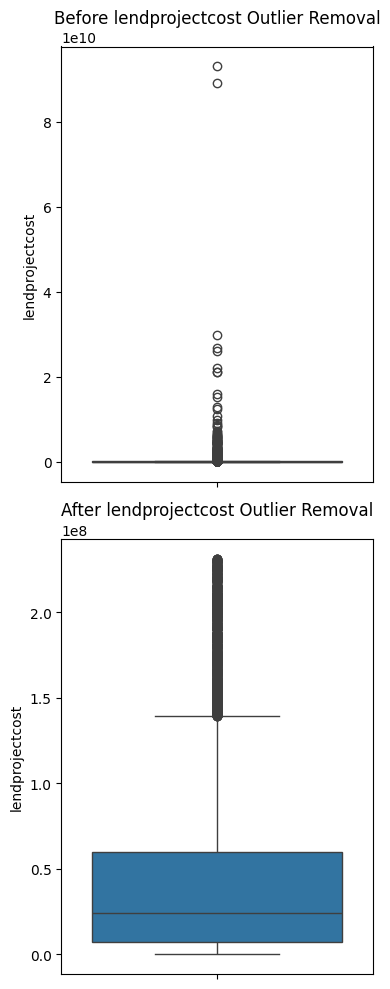

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,totalamt,grantamt,sector1,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,0,500000,,NaN,NaN,,True,False,False,False
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,200000000,0,,NaN,NaN,,True,False,False,False
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,58330000,0,,NaN,NaN,,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,20000000,0,,NaN,NaN,,True,False,False,False
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,100000000,0,Social Protection,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,N,L,Closed,Agricultural Machinery Project,...,2500000,0,(Historic)Agriculture adjustment,(Historic)Agriculture adjustment,Fishing and Forestry; Agriculture,,False,True,False,False
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,...,13500000,0,(Historic)Hydro,(Historic)Hydro,(Historic)Electric Power & Other Energy,,False,True,False,False
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,...,12000000,0,(Historic)Economic management,(Historic)Economic management,(Historic)Multisector,,False,True,False,False
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Post War Reconstruction Project,...,40000000,0,(Historic)Economic management,(Historic)Economic management,(Historic)Multisector,,False,True,False,False


In [283]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Kolom-kolom yang akan dihapus outlier
columns_to_process = ['lendprojectcost']

# Simpan data sebelum penghapusan outlier untuk visualisasi
plt.figure(figsize=(17, 10))
for i, col in enumerate(columns_to_process, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=projects_df[col])
    plt.title(f'Before {col} Outlier Removal')

# Hapus outlier untuk setiap kolom
for col in columns_to_process:
    projects_df = remove_outliers_iqr(projects_df, col)

# Visualisasi data setelah penghapusan outlier menggunakan boxplot
for i, col in enumerate(columns_to_process, 6):
    plt.subplot(2, 5, i)
    sns.boxplot(y=projects_df[col])
    plt.title(f'After {col} Outlier Removal')

plt.tight_layout()
plt.show()

projects_df

###### 2.3.4 Scalling Features pada column lendprojectcost

In [284]:
# Kolom-kolom yang akan di-scaling
columns_to_scale = ['lendprojectcost']

# Pilih metode scaling yang ingin digunakan (StandardScaler atau MinMaxScaler)
scaler = MinMaxScaler()

# Lakukan scaling pada kolom-kolom yang dipilih
scaled_values = scaler.fit_transform(projects_df[columns_to_scale])

# Buat dataframe baru dengan nilai yang telah discaling
scaled_projects_df = pd.DataFrame(scaled_values, columns=['projectcost_scaled'])

# Gabungkan dataframe utama dengan dataframe yang telah discaling
projects_df = pd.concat([projects_df, scaled_projects_df], axis=1)

# Tampilkan dataset baru setelah scaling
projects_df

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,grantamt,sector1,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline,projectcost_scaled
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,500000.0,,NaN,NaN,,True,False,False,False,0.002164
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,0.0,,NaN,NaN,,True,False,False,False,0.865426
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,0.0,,NaN,NaN,,True,False,False,False,0.216357
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,0.0,,NaN,NaN,,True,False,False,False,0.216357
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,0.0,Social Protection,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False,0.432713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064907
16061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043271
16063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021636
16070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112505


###### 2.3.5 Feature Engineering

In [285]:
# Membuat kolom baru dengan menggabungkan informasi dari beberapa kolom
projects_df['project_type'] = projects_df['lendinginstr'] + ' - ' + projects_df['productlinetype']

# Menampilkan hasil feature engineering
projects_df[['id', 'lendinginstr', 'productlinetype', 'project_type']]

,id,lendinginstr,productlinetype,project_type
0,P162228,Investment Project Financing,L,Investment Project Financing - L
1,P163962,Investment Project Financing,L,Investment Project Financing - L
2,P167672,Investment Project Financing,L,Investment Project Financing - L
3,P158768,Investment Project Financing,L,Investment Project Financing - L
4,P161364,Investment Project Financing,L,Investment Project Financing - L
...,...,...,...,...
16052,NaN,NaN,NaN,NaN
16061,NaN,NaN,NaN,NaN
16063,NaN,NaN,NaN,NaN
16070,NaN,NaN,NaN,NaN


In [286]:
projects_df

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,sector1,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline,projectcost_scaled,project_type
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,,NaN,NaN,,True,False,False,False,0.002164,Investment Project Financing - L
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,,NaN,NaN,,True,False,False,False,0.865426,Investment Project Financing - L
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,Social Protection,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False,0.432713,Investment Project Financing - L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064907,NaN
16061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043271,NaN
16063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021636,NaN
16070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112505,NaN


###### 2.3.6 Ubah nama kolom lendprojectcost menjadi 'projectcost'

In [287]:
# Merubah nama kolom lendprojectcost menjadi projectcost
projects_df = projects_df.copy()  # Membuat salinan DataFrame
projects_df.loc[:, 'projectcost'] = projects_df['lendprojectcost']

# Menampilkan hasil perubahan nama kolom
projects_df

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline,projectcost_scaled,project_type,projectcost
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,NaN,NaN,,True,False,False,False,0.002164,Investment Project Financing - L,500000.0
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,NaN,NaN,,True,False,False,False,0.865426,Investment Project Financing - L,200000000.0
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False,0.432713,Investment Project Financing - L,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064907,NaN,NaN
16061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043271,NaN,NaN
16063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021636,NaN,NaN
16070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112505,NaN,NaN


###### 2.3.6 Hapus kolom lendprojectcost pada dataframe

In [288]:
# Menghapus kolom 'lendprojectcost' dari dataframe projects_df
projects_df.drop('lendprojectcost', axis=1, inplace=True)

# Menampilkan dataframe setelah penghapusan kolom
projects_df

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline,projectcost_scaled,project_type,projectcost
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,NaN,NaN,,True,False,False,False,0.002164,Investment Project Financing - L,500000.0
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,NaN,NaN,,True,False,False,False,0.865426,Investment Project Financing - L,200000000.0
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False,0.432713,Investment Project Financing - L,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064907,NaN,NaN
16061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043271,NaN,NaN
16063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021636,NaN,NaN
16070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112505,NaN,NaN


###### 2.3.7 Ubah nama column countryname menjadi Country Name

In [289]:
# Mengubah nama kolom 'countryname' menjadi 'Country Name'
projects_df.rename(columns={'countryname': 'Country Name'}, inplace=True)

# Menampilkan dataframe setelah perubahan nama kolom
projects_df

,id,regionname,Country Name,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline,projectcost_scaled,project_type,projectcost
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,NaN,NaN,,True,False,False,False,0.002164,Investment Project Financing - L,500000.0
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,NaN,NaN,,True,False,False,False,0.865426,Investment Project Financing - L,200000000.0
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False,0.432713,Investment Project Financing - L,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064907,NaN,NaN
16061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043271,NaN,NaN
16063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021636,NaN,NaN
16070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112505,NaN,NaN


###### 2.3.8 Hapus baris yang memiliki nilai NaN > 3

In [290]:
# Menghitung jumlah nilai NaN dalam setiap baris
nan_counts = projects_df.isnull().sum(axis=1)

# Indeks baris yang memiliki lebih dari 3 nilai NaN
rows_to_drop = nan_counts[nan_counts > 3].index

# Hapus baris-baris dengan lebih dari 3 nilai NaN
projects_df.drop(rows_to_drop, inplace=True)

# Tampilkan dataset setelah penghapusan
projects_df


,id,regionname,Country Name,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline,projectcost_scaled,project_type,projectcost
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,NaN,NaN,,True,False,False,False,0.002164,Investment Project Financing - L,500000.0
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,NaN,NaN,,True,False,False,False,0.865426,Investment Project Financing - L,200000000.0
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False,0.432713,Investment Project Financing - L,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,N,L,Closed,Agricultural Machinery Project,...,(Historic)Agriculture adjustment,Fishing and Forestry; Agriculture,,False,True,False,False,NaN,Financial Intermediary Loan - L,2500000.0
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,...,(Historic)Hydro,(Historic)Electric Power & Other Energy,,False,True,False,False,NaN,Specific Investment Loan - L,13500000.0
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,...,(Historic)Economic management,(Historic)Multisector,,False,True,False,False,NaN,Structural Adjustment Loan - L,12000000.0
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Post War Reconstruction Project,...,(Historic)Economic management,(Historic)Multisector,,False,True,False,False,NaN,Structural Adjustment Loan - L,40000000.0


#### 3. Extract, Clean, Transform data dari sumber csv, json, xml, db, API untuk file population_data

##### 3.1 Extract data file CSV

In [291]:
# 1. Membaca Dataset dari file CSV
population1_df = pd.read_csv('C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/population_data.csv', skiprows=4)

missing_values = population1_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = population1_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

population1_df.head()

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


##### 3.2 Extract data file JSON

In [292]:
# 2. Ekstrak data dari file JSON
with open('C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/population_data.json') as f:
    data = json.load(f)

# Konversi data menjadi DataFrame
population2_df = pd.DataFrame(data)

# Cek missing values
missing_values = population2_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = population2_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

population2_df.head()

Jumlah Missing Values:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64
Jumlah Duplikasi Data: 0


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [293]:
# Mendapatkan total baris (row) dan kolom (column)
total_baris, total_kolom = population2_df.shape

print("Total baris dalam DataFrame adalah:", total_baris)

Total baris dalam DataFrame adalah: 264


##### 3.3 Extract data file XML

In [294]:
# 3. Read the XML file
with open("C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/population_data.xml", "r") as f:
    population_data_xml = f.read()

# Parse XML using Beautiful Soup
soup_population_data_xml = BeautifulSoup(population_data_xml, "lxml")

# Extract data from XML and store in a list of dictionaries
data = []

for record in soup_population_data_xml.find_all("record"):
    record_data = {}

    for field in record.find_all("field"):
        name = field.get("name")
        value = field.text
        record_data[name] = value

    data.append(record_data)

# Convert list of dictionaries into DataFrame
population3_df_xml = pd.DataFrame(data)

population3_df_xml.head()

,Country or Area,Item,Year,Value
0,Aruba,"Population, total",1960,54211
1,Aruba,"Population, total",1961,55438
2,Aruba,"Population, total",1962,56225
3,Aruba,"Population, total",1963,56695
4,Aruba,"Population, total",1964,57032


In [295]:
# Mendapatkan total baris (row) dan kolom (column)
total_baris, total_kolom = population3_df_xml.shape

print("Total baris dalam DataFrame adalah:", total_baris)

Total baris dalam DataFrame adalah: 15312


In [296]:
# Cek missing values
missing_values = population3_df_xml.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = population3_df_xml.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Missing Values:
 Country or Area    0
Item               0
Year               0
Value              0
dtype: int64
Jumlah Duplikasi Data: 0


##### 3.4 Extract data file database

In [297]:
# Connect to SQLite database
conn = sqlite3.connect("C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/population_data.db")
cursor = conn.cursor()

# Perform select query
query = "SELECT * FROM population_data"
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

population4_df_db = pd.DataFrame(results)

# Close connection
conn.close()

population4_df_db.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [298]:
# Cek missing values
missing_values = population4_df_db.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = population4_df_db.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Missing Values:
 0     0
1     0
2     0
3     0
4     0
     ..
58    2
59    2
60    2
61    2
62    2
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


##### 3.5 Extract data file API

In [299]:
# API endpoint
url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=30000"

# Send GET request
response = requests.get(url)

# Check if request was successful (status code 200)
if response.status_code == 200:
    # Extract relevant data from JSON response
    data = response.json()[1]  # Data starts from index 1

    # Create a list of dictionaries containing relevant data
    records = []
    for entry in data:
        record = {
            "Country Name": entry["country"]["value"],
            "Country Code": entry["countryiso3code"],
            "Year": entry["date"],
            "Population": entry["value"]
        }
        records.append(record)

    # Convert list of dictionaries into DataFrame
    population5_API_df = pd.DataFrame(records)

    # Print the number of records extracted
    print("Number of records extracted:", len(population5_API_df))
else:
    print("Error:", response.status_code)

population5_API_df.head()

Number of records extracted: 17024


,Country Name,Country Code,Year,Population
0,Africa Eastern and Southern,AFE,2023,NaN
1,Africa Eastern and Southern,AFE,2022,720859132.0
2,Africa Eastern and Southern,AFE,2021,702977106.0
3,Africa Eastern and Southern,AFE,2020,685112979.0
4,Africa Eastern and Southern,AFE,2019,667242986.0


In [300]:
# Cek missing values
missing_values = population5_API_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = population5_API_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Missing Values:
 Country Name      0
Country Code      0
Year              0
Population      359
dtype: int64
Jumlah Duplikasi Data: 0


##### 3.6 Clean Data

###### 3.6.1 Delete Column yang tidak digunakan

In [301]:
# Menghapus kolom "Unnamed: 62" dari dataframe population1_df
population1_df.drop(columns=['Unnamed: 62'], inplace=True)

population1_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


###### 3.6.2 Tampilkan informasi setiap dataframe

In [302]:
population1_df.info()
population2_df.info()
population3_df_xml.info()
population4_df_db.info()
population5_API_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

###### 3.6.3 Mengganti nilai NaN menjadi nilai 0

In [303]:
# Mengganti nilai NaN menjadi 0
population1_df = population1_df.fillna(0)
population2_df = population2_df.fillna(0)
population3_df_xml = population3_df_xml.fillna(0)
population4_df_db = population4_df_db.fillna(0)
population5_API_df = population5_API_df.fillna(0)

In [304]:
population1_df.head(6)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,92490932.0,95044497.0,97682294.0,100411076.0,103239902.0,106174988.0,...,339825483.0,348145094.0,356508908.0,364895878.0,373306993.0,381702086.0,390043028.0,398304960.0,406452690.0,414491886.0


##### 3.7 Transform Dataset

###### 3.7.1 Melting dataset population_data.csv

In [305]:
# Melting dataset
population1_df = pd.melt(population1_df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')

population1_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,92490932.0
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,1960,92634.0
7,Argentina,ARG,"Population, total",SP.POP.TOTL,1960,20619075.0
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1960,1874120.0
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,1960,20013.0


###### 3.7.2 Melting dataset population_data.json

In [306]:
# Melting dataset
population2_df = pd.melt(population2_df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')

population2_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,92490932.0
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,1960,92634.0
7,Argentina,ARG,"Population, total",SP.POP.TOTL,1960,20619075.0
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1960,1874120.0
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,1960,20013.0


###### 3.7.3 Ubah nama kolom pada dataframe population XML

In [307]:
# Mengubah nama kolom
population3_df_xml = population3_df_xml.rename(columns={'Country or Area': 'Country Name', 'Item': 'Indicator Name', 'Value': 'Population'})

# Menampilkan hasil
population3_df_xml.head()

,Country Name,Indicator Name,Year,Population
0,Aruba,"Population, total",1960,54211
1,Aruba,"Population, total",1961,55438
2,Aruba,"Population, total",1962,56225
3,Aruba,"Population, total",1963,56695
4,Aruba,"Population, total",1964,57032


###### 3.7.4 Ubah dan Drop Column pada dataset population db

In [308]:
# Ubah nama kolom
population4_df_db = population4_df_db.rename(columns={1: 'Country Name', 2: 'Country Code', 3: 'Indicator Name', 4: 'Indicator Code'})

# Drop kolom pertama
population4_df_db = population4_df_db.drop(columns=[0])

# Ubah nama kolom 5 - 62
new_columns = {i: str(1960 + i - 5) for i in range(5, 63)}
population4_df_db = population4_df_db.rename(columns=new_columns)

# Menampilkan hasil
population4_df_db.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


###### 3.7.5 Melting dataset population_data.db

In [309]:
# Melting dataset
population4_df_db = pd.melt(population4_df_db, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')

population4_df_db.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,92490932.0
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,1960,92634.0
7,Argentina,ARG,"Population, total",SP.POP.TOTL,1960,20619075.0
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1960,1874120.0
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,1960,20013.0


###### 3.7.6 Gabungkan dataset(dataframe) population_data csv, json, xml, dan db

In [310]:
# Menggabungkan DataFrame menggunakan combine_first()
merged_population_df = population1_df.combine_first(population2_df)
merged_population_df = merged_population_df.combine_first(population3_df_xml)
merged_population_df = merged_population_df.combine_first(population4_df_db)

# Menghilangkan duplikasi data
merged_population_df = merged_population_df.drop_duplicates()

# Menampilkan hasil
merged_population_df.head()

,Country Code,Country Name,Indicator Code,Indicator Name,Population,Year
0,ABW,Aruba,SP.POP.TOTL,"Population, total",54211.0,1960
1,AFG,Afghanistan,SP.POP.TOTL,"Population, total",8996351.0,1960
2,AGO,Angola,SP.POP.TOTL,"Population, total",5643182.0,1960
3,ALB,Albania,SP.POP.TOTL,"Population, total",1608800.0,1960
4,AND,Andorra,SP.POP.TOTL,"Population, total",13411.0,1960


In [311]:
merged_population_df.tail()

,Country Code,Country Name,Indicator Code,Indicator Name,Population,Year
15307,XKX,Kosovo,SP.POP.TOTL,"Population, total",1830700.0,2017
15308,YEM,"Yemen, Rep.",SP.POP.TOTL,"Population, total",28250420.0,2017
15309,ZAF,South Africa,SP.POP.TOTL,"Population, total",56717156.0,2017
15310,ZMB,Zambia,SP.POP.TOTL,"Population, total",17094130.0,2017
15311,ZWE,Zimbabwe,SP.POP.TOTL,"Population, total",16529904.0,2017


In [312]:
# Susun kembali kolom sesuai urutan yang diinginkan
merged_population_df = merged_population_df.reindex(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Year', 'Population'])

# Menampilkan hasil
merged_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


###### 3.7.7 Gabungkan dataset merged dengan dataset population API agar menjadi data final gabungan

In [313]:
# Konversi kolom 'Year' menjadi tipe data numerik
population5_API_df['Year'] = pd.to_numeric(population5_API_df['Year'])

# Filter DataFrame population5_API_df untuk tahun 2018-2023
population5_API_df_filtered = population5_API_df[(population5_API_df['Year'] >= 2018) & (population5_API_df['Year'] <= 2023)]

# Menggabungkan dataset
merged_population_df = pd.concat([merged_population_df, population5_API_df_filtered])

# Menghilangkan duplikasi data (jika ada)
merged_population_df = merged_population_df.drop_duplicates()

# Konversi tipe data kolom 'Year' kembali menjadi string
merged_population_df['Year'] = merged_population_df['Year'].astype(str)

# Mengurutkan DataFrame berdasarkan 'Country Name', 'Year'
merged_population_df = merged_population_df.sort_values(by=['Country Name', 'Year'])

# Menampilkan hasil
merged_population_df.reset_index(drop=True, inplace=True)
merged_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,9166764.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,9345868.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9533954.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9731361.0


###### 3.7.8 Mengganti nilai NaN pada kolom Indicator Code dan Indicator Name

In [314]:
# Mengganti nilai NaN dengan metode fillna
merged_population_df['Indicator Code'] = merged_population_df['Indicator Code'].fillna('SP.POP.TOTL')
merged_population_df['Indicator Name'] = merged_population_df['Indicator Name'].fillna('Population, total')

merged_population_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1961,9166764.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1962,9345868.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1963,9533954.0
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1964,9731361.0
5,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1965,9938414.0
6,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1966,10152331.0
7,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1967,10372630.0
8,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1968,10604346.0
9,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1969,10854428.0


###### 3.7.9 Metode replace pada kolom Indicator Name

In [315]:
# Metode regex replace
merged_population_df['Indicator Name'] = merged_population_df['Indicator Name'].str.replace(r'Population, total', r'Population Total', regex=True)

merged_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Afghanistan,AFG,Population Total,SP.POP.TOTL,1960,8996351.0
1,Afghanistan,AFG,Population Total,SP.POP.TOTL,1961,9166764.0
2,Afghanistan,AFG,Population Total,SP.POP.TOTL,1962,9345868.0
3,Afghanistan,AFG,Population Total,SP.POP.TOTL,1963,9533954.0
4,Afghanistan,AFG,Population Total,SP.POP.TOTL,1964,9731361.0


###### 3.7.10 Menghapus Outliers

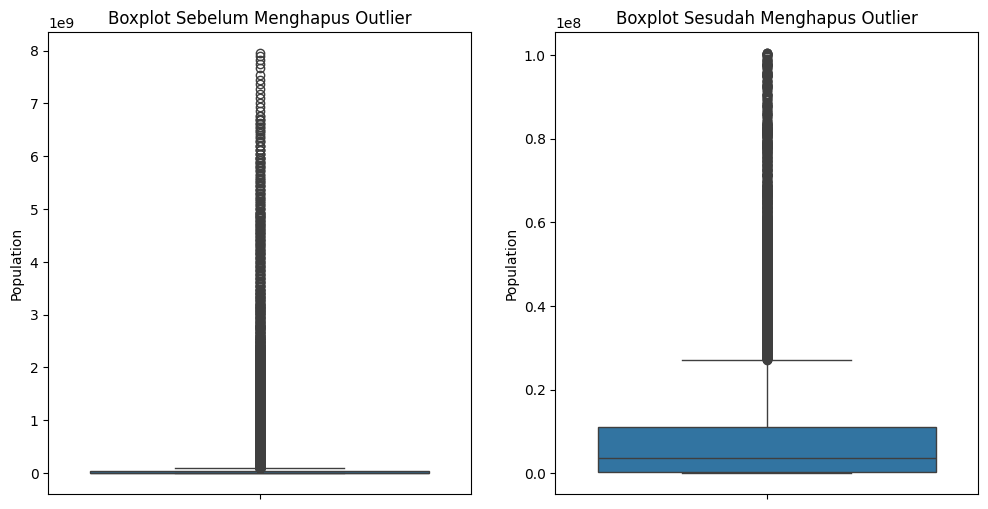

In [316]:
# Menghitung quartile pertama (Q1) dan quartile ketiga (Q3)
Q1 = merged_population_df['Population'].quantile(0.25)
Q3 = merged_population_df['Population'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
merged_population_df_iqr = merged_population_df[(merged_population_df['Population'] >= lower_bound) & (merged_population_df['Population'] <= upper_bound)]

# Visualisasi data sebelum dan sesudah menghapus outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=merged_population_df['Population'])
plt.title('Boxplot Sebelum Menghapus Outlier')
plt.subplot(1, 2, 2)
sns.boxplot(y=merged_population_df_iqr['Population'])
plt.title('Boxplot Sesudah Menghapus Outlier')
plt.show()

In [317]:
merged_population_df_iqr

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Afghanistan,AFG,Population Total,SP.POP.TOTL,1960,8996351.0
1,Afghanistan,AFG,Population Total,SP.POP.TOTL,1961,9166764.0
2,Afghanistan,AFG,Population Total,SP.POP.TOTL,1962,9345868.0
3,Afghanistan,AFG,Population Total,SP.POP.TOTL,1963,9533954.0
4,Afghanistan,AFG,Population Total,SP.POP.TOTL,1964,9731361.0
...,...,...,...,...,...,...
16903,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2019,15354608.0
16904,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2020,15669666.0
16905,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2021,15993524.0
16906,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2022,16320537.0


###### 3.7.11 Scallig Features pada column Population

In [318]:
# Inisialisasi objek MinMaxScaler
scaler_minmax = MinMaxScaler()

# Mengambil kolom yang akan di-scaling (misalnya, 'Population')
population_data = merged_population_df_iqr['Population'].values.reshape(-1, 1)

# Melakukan scaling menggunakan MinMaxScaler
population_scaled_minmax = scaler_minmax.fit_transform(population_data)

# Membuat dataframe baru untuk menyimpan hasil scaling
scaled_population_df = pd.DataFrame(population_scaled_minmax, columns=['Population_MinMaxScaled'])

# Gabungkan dataframe hasil scaling dengan dataframe utama
merged_population_df_scaled = pd.concat([merged_population_df_iqr.reset_index(drop=True), scaled_population_df], axis=1)

# Tampilkan DataFrame hasil gabungan
merged_population_df_scaled

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population,Population_MinMaxScaled
0,Afghanistan,AFG,Population Total,SP.POP.TOTL,1960,8996351.0,0.089553
1,Afghanistan,AFG,Population Total,SP.POP.TOTL,1961,9166764.0,0.091249
2,Afghanistan,AFG,Population Total,SP.POP.TOTL,1962,9345868.0,0.093032
3,Afghanistan,AFG,Population Total,SP.POP.TOTL,1963,9533954.0,0.094904
4,Afghanistan,AFG,Population Total,SP.POP.TOTL,1964,9731361.0,0.096869
...,...,...,...,...,...,...,...
13711,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2019,15354608.0,0.152845
13712,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2020,15669666.0,0.155982
13713,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2021,15993524.0,0.159205
13714,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2022,16320537.0,0.162461


In [319]:
jumlah_baris = merged_population_df_scaled.shape[0]
print("Jumlah baris dalam DataFrame adalah:", jumlah_baris)

Jumlah baris dalam DataFrame adalah: 13716


###### 3.7.12 Hapus baris yang memiliki nilai Null

In [320]:
# Menghapus baris yang memiliki nilai null
merged_population_df_scaled_clean = merged_population_df_scaled.dropna(axis=0)

# Menampilkan informasi tentang dataframe setelah penghapusan nilai null
print(merged_population_df_scaled_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13716 entries, 0 to 13715
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             13716 non-null  object 
 1   Country Code             13716 non-null  object 
 2   Indicator Name           13716 non-null  object 
 3   Indicator Code           13716 non-null  object 
 4   Year                     13716 non-null  object 
 5   Population               13716 non-null  object 
 6   Population_MinMaxScaled  13716 non-null  float64
dtypes: float64(1), object(6)
memory usage: 750.2+ KB
None


In [321]:
merged_population_df_scaled_clean

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population,Population_MinMaxScaled
0,Afghanistan,AFG,Population Total,SP.POP.TOTL,1960,8996351.0,0.089553
1,Afghanistan,AFG,Population Total,SP.POP.TOTL,1961,9166764.0,0.091249
2,Afghanistan,AFG,Population Total,SP.POP.TOTL,1962,9345868.0,0.093032
3,Afghanistan,AFG,Population Total,SP.POP.TOTL,1963,9533954.0,0.094904
4,Afghanistan,AFG,Population Total,SP.POP.TOTL,1964,9731361.0,0.096869
...,...,...,...,...,...,...,...
13711,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2019,15354608.0,0.152845
13712,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2020,15669666.0,0.155982
13713,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2021,15993524.0,0.159205
13714,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2022,16320537.0,0.162461


###### 3.7.13 Hapus baris yang memiliki nilai 0 pada kolom Population

In [322]:
# Menghapus baris-baris dengan nilai nol di kolom 'Population'
merged_population_df_scaled_clean = merged_population_df_scaled_clean[merged_population_df_scaled_clean['Population'] != 0]

# Menampilkan DataFrame setelah menghapus baris dengan nilai nol di kolom 'Population'
merged_population_df_scaled_clean

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population,Population_MinMaxScaled
0,Afghanistan,AFG,Population Total,SP.POP.TOTL,1960,8996351.0,0.089553
1,Afghanistan,AFG,Population Total,SP.POP.TOTL,1961,9166764.0,0.091249
2,Afghanistan,AFG,Population Total,SP.POP.TOTL,1962,9345868.0,0.093032
3,Afghanistan,AFG,Population Total,SP.POP.TOTL,1963,9533954.0,0.094904
4,Afghanistan,AFG,Population Total,SP.POP.TOTL,1964,9731361.0,0.096869
...,...,...,...,...,...,...,...
13710,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2018,15052184.0,0.149835
13711,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2019,15354608.0,0.152845
13712,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2020,15669666.0,0.155982
13713,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2021,15993524.0,0.159205


In [323]:
merged_population_df_scaled_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13280 entries, 0 to 13714
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             13280 non-null  object 
 1   Country Code             13280 non-null  object 
 2   Indicator Name           13280 non-null  object 
 3   Indicator Code           13280 non-null  object 
 4   Year                     13280 non-null  object 
 5   Population               13280 non-null  object 
 6   Population_MinMaxScaled  13280 non-null  float64
dtypes: float64(1), object(6)
memory usage: 830.0+ KB


###### 3.7.14 Mengubah tipe data kolom 'Population' menjadi float

In [324]:
# Mengubah tipe data kolom 'Population' menjadi float menggunakan .loc[]
merged_population_df_scaled_clean.loc[:, 'Population'] = merged_population_df_scaled_clean['Population'].astype(float)

# Menampilkan dataframe setelah perubahan
merged_population_df_scaled_clean



,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population,Population_MinMaxScaled
0,Afghanistan,AFG,Population Total,SP.POP.TOTL,1960,8996351.0,0.089553
1,Afghanistan,AFG,Population Total,SP.POP.TOTL,1961,9166764.0,0.091249
2,Afghanistan,AFG,Population Total,SP.POP.TOTL,1962,9345868.0,0.093032
3,Afghanistan,AFG,Population Total,SP.POP.TOTL,1963,9533954.0,0.094904
4,Afghanistan,AFG,Population Total,SP.POP.TOTL,1964,9731361.0,0.096869
...,...,...,...,...,...,...,...
13710,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2018,15052184.0,0.149835
13711,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2019,15354608.0,0.152845
13712,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2020,15669666.0,0.155982
13713,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2021,15993524.0,0.159205


###### 3.7.15 Penggantian menggunakan ekspresi reguler pada kolom 'Country Name'

In [325]:
# Terapkan penggantian menggunakan ekspresi reguler pada kolom 'Country Name' dengan .loc
merged_population_df_scaled_clean.loc[:, 'Country Name'] = merged_population_df_scaled_clean['Country Name'].str.replace('"', '').str.split(',').str[0]

# Menampilkan hasil
merged_population_df_scaled_clean

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population,Population_MinMaxScaled
0,Afghanistan,AFG,Population Total,SP.POP.TOTL,1960,8996351.0,0.089553
1,Afghanistan,AFG,Population Total,SP.POP.TOTL,1961,9166764.0,0.091249
2,Afghanistan,AFG,Population Total,SP.POP.TOTL,1962,9345868.0,0.093032
3,Afghanistan,AFG,Population Total,SP.POP.TOTL,1963,9533954.0,0.094904
4,Afghanistan,AFG,Population Total,SP.POP.TOTL,1964,9731361.0,0.096869
...,...,...,...,...,...,...,...
13710,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2018,15052184.0,0.149835
13711,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2019,15354608.0,0.152845
13712,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2020,15669666.0,0.155982
13713,Zimbabwe,ZWE,Population Total,SP.POP.TOTL,2021,15993524.0,0.159205


###### 3.7.16 Save to .csv

In [326]:
# Simpan ke file CSV
merged_population_file_path = 'C:/code/rayhan-qalby-r-DE-Mini-Project/data_process/merged_population.csv'
merged_population_df_scaled_clean.to_csv(merged_population_file_path, index=False)

#### 4. Extract, Clean, Combine data dari rural_population_percent.csv dan electricity_access_percent.csv

##### 4.1 Extract data

In [327]:
# Baca file CSV
rural_population_df = pd.read_csv("C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/rural_population_percent.csv", skiprows=4)
electricity_access_df = pd.read_csv("C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/electricity_access_percent.csv", skiprows=4)

In [328]:
rural_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


##### 4.2 Cek Missing values dan duplicate rural_population

In [329]:
# Cek missing values
missing_values = rural_population_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = rural_population_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


In [330]:
rural_population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            259 non-null    float64
 5   1961            259 non-null    float64
 6   1962            259 non-null    float64
 7   1963            259 non-null    float64
 8   1964            259 non-null    float64
 9   1965            259 non-null    float64
 10  1966            259 non-null    float64
 11  1967            259 non-null    float64
 12  1968            259 non-null    float64
 13  1969            259 non-null    float64
 14  1970            259 non-null    float64
 15  1971            259 non-null    float64
 16  1972            259 non-null    float64
 17  1973            259 non-null    flo

In [331]:
electricity_access_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


##### 4.3 Cek Missing values dan duplicate electricity_access

In [332]:
# Cek missing values
missing_values = electricity_access_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = electricity_access_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


In [333]:
electricity_access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

##### 4.4 Mengganti nilai NaN dengan 0 pada kedua dataframe

In [334]:
# Mengganti nilai NaN dengan nilai 0 dalam dataframe electricity_access_df
electricity_access_df.fillna(0, inplace=True)

# Mengganti nilai NaN dengan nilai 0 dalam dataframe rural_population_df
rural_population_df.fillna(0, inplace=True)

##### 4.5 Hapus kolom yang tidak digunakan

In [335]:
# Menghapus kolom "Unnamed: 62" dari dataframe electricity_access_df
electricity_access_df.drop(columns=['Unnamed: 62'], inplace=True)

# Menghapus kolom "Unnamed: 62" dari dataframe rural_population_df
rural_population_df.drop(columns=['Unnamed: 62'], inplace=True)

electricity_access_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [336]:
rural_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


##### 4.6 Gabungkan dataframe rural_population dengan electricity_access

In [337]:
# Pilih kolom tahun yang akan digunakan
rural_population_df = rural_population_df[["Country Name", "Country Code"] + [str(year) for year in range(1960, 2018)]]
electricity_access_df = electricity_access_df[["Country Name", "Country Code"] + [str(year) for year in range(1960, 2018)]]

# Gabungkan data berdasarkan kolom "Country Name" dan "Country Code"
merged_rural_electricity_df = pd.merge(rural_population_df, electricity_access_df, on=["Country Name", "Country Code"], suffixes=('_rural', '_electricity'))

merged_rural_electricity_df.head()

,Country Name,Country Code,1960_rural,1961_rural,1962_rural,1963_rural,1964_rural,1965_rural,1966_rural,1967_rural,...,2008_electricity,2009_electricity,2010_electricity,2011_electricity,2012_electricity,2013_electricity,2014_electricity,2015_electricity,2016_electricity,2017_electricity
0,Aruba,ABW,49.224,49.239,49.254,49.270,49.285,49.300,49.315,49.330,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,91.779,91.492,91.195,90.890,90.574,90.250,89.915,89.570,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,89.565,89.202,88.796,88.376,87.942,87.496,87.035,86.559,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,69.295,69.057,68.985,68.914,68.842,68.770,68.698,68.626,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,41.550,39.017,36.538,34.128,31.795,29.555,27.407,25.359,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


##### 4.7 Atur presentase agar 1 dibelakang koma

In [338]:
# Daftar tahun yang ingin Anda proses
tahun = range(1960, 2018)  # Misalnya, dari tahun 1960 hingga 2017

# Melakukan loop melalui setiap tahun
for year in tahun:
    # Membulatkan nilai persentase ke satu desimal
    merged_rural_electricity_df[f"{year}_rural"] = merged_rural_electricity_df[f"{year}_rural"].round(2)
    merged_rural_electricity_df[f"{year}_electricity"] = merged_rural_electricity_df[f"{year}_electricity"].round(2)

merged_rural_electricity_df.head()


,Country Name,Country Code,1960_rural,1961_rural,1962_rural,1963_rural,1964_rural,1965_rural,1966_rural,1967_rural,...,2008_electricity,2009_electricity,2010_electricity,2011_electricity,2012_electricity,2013_electricity,2014_electricity,2015_electricity,2016_electricity,2017_electricity
0,Aruba,ABW,49.22,49.24,49.25,49.27,49.28,49.30,49.32,49.33,...,93.09,93.35,93.36,93.94,94.26,94.58,94.91,95.24,95.57,0.0
1,Afghanistan,AFG,91.78,91.49,91.20,90.89,90.57,90.25,89.92,89.57,...,42.40,44.85,42.70,43.22,69.10,67.26,89.50,71.50,84.14,0.0
2,Angola,AGO,89.56,89.20,88.80,88.38,87.94,87.50,87.04,86.56,...,31.27,32.38,33.51,34.60,35.82,36.99,32.00,42.00,40.52,0.0
3,Albania,ALB,69.30,69.06,68.98,68.91,68.84,68.77,68.70,68.63,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.0
4,Andorra,AND,41.55,39.02,36.54,34.13,31.80,29.56,27.41,25.36,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.0


##### 4.7 Pembaruan dataframe

In [339]:
# Melt DataFrame untuk mengubah kolom tahun-tahun menjadi satu kolom 'Year' dan nilai presentase menjadi satu kolom 'Value'
df_melted = pd.melt(merged_rural_electricity_df, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Value')

# Splitting 'Year' column into 'Year' and 'Type' columns
df_melted[['Year', 'Type']] = df_melted['Year'].str.split('_', expand=True)

# Filter hanya untuk jenis data 'rural' dan 'electricity'
df_filtered = df_melted[df_melted['Type'].isin(['rural', 'electricity'])]

# Menggabungkan kembali data untuk mendapatkan kolom baru 'electricityaccesspercent'
df_pivot = df_filtered.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Type', values='Value').reset_index()

# Menampilkan DataFrame hasil akhir dengan kolom yang diinginkan
merged_rural_electricity_df = df_pivot[['Country Name', 'Country Code', 'Year', 'rural', 'electricity']]
merged_rural_electricity_df.columns = ['Country Name', 'Country Code', 'Year', 'ruralpopulationpercent', 'electricityaccesspercent']
merged_rural_electricity_df.head(10)

,Country Name,Country Code,Year,ruralpopulationpercent,electricityaccesspercent
0,Afghanistan,AFG,1960,91.78,0.0
1,Afghanistan,AFG,1961,91.49,0.0
2,Afghanistan,AFG,1962,91.20,0.0
3,Afghanistan,AFG,1963,90.89,0.0
4,Afghanistan,AFG,1964,90.57,0.0
5,Afghanistan,AFG,1965,90.25,0.0
6,Afghanistan,AFG,1966,89.92,0.0
7,Afghanistan,AFG,1967,89.57,0.0
8,Afghanistan,AFG,1968,89.21,0.0
9,Afghanistan,AFG,1969,88.85,0.0


##### 4.8 Penggantian menggunakan ekspresi reguler pada kolom 'Country Name'

In [340]:
# Terapkan penggantian menggunakan ekspresi reguler pada kolom 'Country Name'

merged_rural_electricity_df['Country Name'] = merged_rural_electricity_df['Country Name'].str.replace('"', '').str.split(',').str[0]

# Menampilkan hasil
merged_rural_electricity_df.head()

,Country Name,Country Code,Year,ruralpopulationpercent,electricityaccesspercent
0,Afghanistan,AFG,1960,91.78,0.0
1,Afghanistan,AFG,1961,91.49,0.0
2,Afghanistan,AFG,1962,91.20,0.0
3,Afghanistan,AFG,1963,90.89,0.0
4,Afghanistan,AFG,1964,90.57,0.0


##### 4.9 Save to .csv

In [341]:
# Simpan ke file CSV
merged_file_path = 'C:/code/rayhan-qalby-r-DE-Mini-Project/data_process/merged_rural_electricity.csv'
merged_rural_electricity_df.to_csv(merged_file_path, index=False)

#### 5. Extract, Clean, Encoding data dari file mystery.csv

##### 5.1 Extract data

In [342]:
# Membaca dataset mystery.csv dengan encoding utf-16
mystery_df = pd.read_csv("C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/mystery.csv", encoding="utf-16")

mystery_df.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [343]:
mystery_df.tail()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


##### 5.2 Tampilkan Informasi dataframe

In [344]:
mystery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      264 non-null    int64  
 1   Country Name    264 non-null    object 
 2   Country Code    264 non-null    object 
 3   Indicator Name  264 non-null    object 
 4   Indicator Code  264 non-null    object 
 5   1960            260 non-null    float64
 6   1961            260 non-null    float64
 7   1962            260 non-null    float64
 8   1963            260 non-null    float64
 9   1964            260 non-null    float64
 10  1965            260 non-null    float64
 11  1966            260 non-null    float64
 12  1967            260 non-null    float64
 13  1968            260 non-null    float64
 14  1969            260 non-null    float64
 15  1970            260 non-null    float64
 16  1971            260 non-null    float64
 17  1972            260 non-null    flo

##### 5.3 Cek Missing value and Duplicate

In [345]:
# Cek missing values
missing_values = mystery_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = mystery_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Missing Values:
 Unnamed: 0        0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


##### 5.4 Hapus kolom yang tidak digunakan

In [346]:
# Menghapus kolom "Unnamed: 0" dari dataframe mystery_df
mystery_df.drop(columns=['Unnamed: 0'], inplace=True)

mystery_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


##### 5.5 Ganti nilai NaN dengan nilai 0

In [347]:
# Mengganti nilai NaN dengan nilai 0 dalam dataframe mystery_df
mystery_df.fillna(0, inplace=True)

mystery_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


##### 5.6 Save to .csv

In [348]:
# Simpan ke file CSV
clean_file_path = 'C:/code/rayhan-qalby-r-DE-Mini-Project/data_process/cleaned_mystery.csv'
mystery_df.to_csv(clean_file_path, index=False)

#### 6. Extract, Clean, Imputing data dari file gdp_data.csv

##### 6.1 Extract data

In [349]:
# Membaca dataset
gdp_data_df = pd.read_csv("C:/code/rayhan-qalby-r-DE-Mini-Project/data_source/gdp_data.csv", skiprows=4)

gdp_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [350]:
gdp_data_df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN
263,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,8.621574e+09,1.014186e+10,1.209845e+10,1.424249e+10,1.545177e+10,1.589105e+10,1.630467e+10,1.661996e+10,1.784582e+10,NaN


##### 6.2 Cek Missing Value dan Duplicate

In [351]:
# Cek missing values
missing_values = gdp_data_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = gdp_data_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


##### 6.3 Hapus kolom yang tidak digunakan

In [352]:
# Menghapus kolom "Unnamed: 62" dari dataframe gdp_data_df
gdp_data_df.drop(columns=['Unnamed: 62'], inplace=True)

gdp_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


##### 6.4 Bulatkan nilai presentase product ke 1 di belakang koma

In [353]:
# Daftar tahun yang ingin diproses
tahun = range(1960, 2018)  # Misalnya, dari tahun 1960 hingga 2017

# Melakukan loop melalui setiap tahun
for year in tahun:
    # Membulatkan nilai yaer ke satu desimal
    gdp_data_df[f"{year}"] = gdp_data_df[f"{year}"].round(1)

gdp_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


##### 6.5 Visualisasi sebelum Imputing

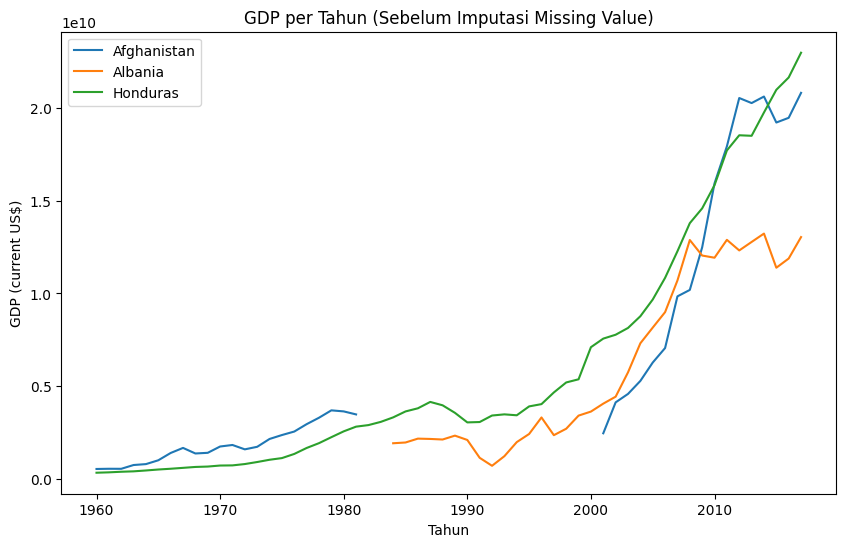

In [354]:
# Lakukan visualisasi data untuk Afganistan, Albania, dan Honduras
countries = ['Afghanistan', 'Albania', 'Honduras']
data = gdp_data_df[gdp_data_df['Country Name'].isin(countries)]

# Plot data
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = data[data['Country Name'] == country]
    years = country_data.columns[4:].astype(int)
    plt.plot(years, country_data.iloc[:, 4:].values.flatten(), label=country)

# Menambahkan judul dan label sumbu
plt.title('GDP per Tahun (Sebelum Imputasi Missing Value)')
plt.xlabel('Tahun')
plt.ylabel('GDP (current US$)')
plt.xticks(range(1960, 2011, 10))  # Set ticks dengan interval 10 tahun
plt.legend()

# Menampilkan plot
plt.show()

##### 6.6 Mengatasi missing value dengan mengisi nilai median

In [355]:
# Inisialisasi SimpleImputer dengan strategi rata-rata
imputer = SimpleImputer(strategy="median")

# Melakukan imputasi pada dataset
gdp_data_imputed = pd.DataFrame(imputer.fit_transform(gdp_data_df.iloc[:, 4:]))

# Menyalin kolom pertama dan kedua dari dataset yang asli
gdp_data_imputed.insert(0, "Country Name", gdp_data_df["Country Name"])
gdp_data_imputed.insert(1, "Country Code", gdp_data_df["Country Code"])

# Menyalin kolom tahun dari dataset yang asli
gdp_data_imputed.columns = ["Country Name", "Country Code"] + [str(year) for year in range(1960, 2018)]

# Menampilkan dataframe hasil imputasi
gdp_data_df.update(gdp_data_imputed)
gdp_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,5.038845e+10,5.447389e+10,5.673199e+10,5.317434e+10,5.324089e+10,5.944777e+10
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


##### 6.7 Hasil Visualisasi setelah Imputing

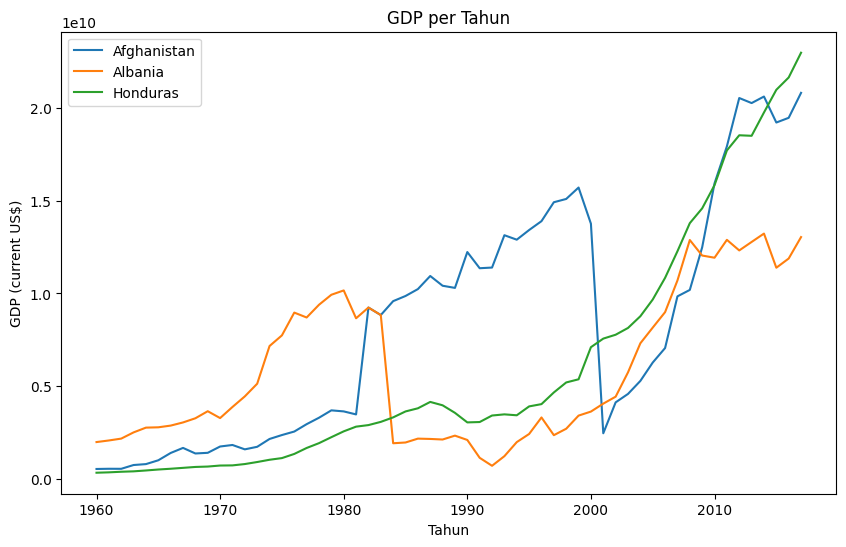

In [356]:
# Data untuk Afganistan, Albania, dan Honduras
countries = ['Afghanistan', 'Albania', 'Honduras']
data = gdp_data_df[gdp_data_df['Country Name'].isin(countries)]

# Plot data
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = data[data['Country Name'] == country]
    years = country_data.columns[4:].astype(int)
    plt.plot(years, country_data.iloc[:, 4:].values.flatten(), label=country)

# Menambahkan judul dan label sumbu
plt.title('GDP per Tahun')
plt.xlabel('Tahun')
plt.ylabel('GDP (current US$)')
plt.xticks(range(1960, 2011, 10))  # Set ticks dengan interval 10 tahun
plt.legend()

# Menampilkan plot
plt.show()

##### 6.8 Pembaruan Dataframe

In [357]:
# Melt DataFrame untuk mengubah kolom tahun-tahun menjadi satu kolom 'Year' dan nilai GDP menjadi satu kolom 'GDP'
melted_df = pd.melt(gdp_data_df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='GDP')

# Menampilkan DataFrame hasil akhir dengan kolom yang diinginkan
gdp_data_final_df = melted_df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Year', 'GDP']]
gdp_data_final_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09


##### 6.9 Scaling Features pada dataframe gdp menggunakan MinMaxScaler. contohnya pada fitur GDP

In [358]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan scaling pada fitur GDP
gdp_data_final_df['gdp_scaled'] = scaler.fit_transform(gdp_data_final_df[['GDP']])

# Tampilkan dataframe setelah scaling
gdp_data_final_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP,gdp_scaled
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09,0.000025
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08,0.000007
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09,0.000025
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09,0.000025
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09,0.000025
...,...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09,0.000088
15308,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017,5.944777e+10,0.000737
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.494193e+11,0.004331
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10,0.000320


##### 6.10 Penggantian menggunakan ekspresi reguler pada kolom 'Country Name'

In [359]:
# Terapkan penggantian menggunakan ekspresi reguler pada kolom 'Country Name'

gdp_data_final_df['Country Name'] = gdp_data_final_df['Country Name'].str.replace('"', '').str.split(',').str[0]

# Menampilkan hasil
gdp_data_final_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP,gdp_scaled
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09,0.000025
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08,0.000007
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09,0.000025
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09,0.000025
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,1.988240e+09,0.000025
...,...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09,0.000088
15308,Yemen,YEM,GDP (current US$),NY.GDP.MKTP.CD,2017,5.944777e+10,0.000737
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.494193e+11,0.004331
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10,0.000320


##### 6.10 Save to .csv

In [360]:
# Simpan ke file CSV
clean_gdp_file_path = 'C:/code/rayhan-qalby-r-DE-Mini-Project/data_process/cleaned_gdp_data.csv'
gdp_data_final_df.to_csv(clean_gdp_file_path, index=False)

#### 7. Feature Engineering

##### 7.1 Penyesuaian Isi data dataframe projects_df pada column Country Name dengan mengambil nilai "Country Name" yang benar pada dataframe merged_rural_electricity_df

In [361]:
# Mendapatkan daftar nama negara yang benar
correct_country_list = merged_rural_electricity_df['Country Name'].unique()

# Mendapatkan daftar nama negara yang ada di projects_df
incorrect_country_list = projects_df['Country Name'].unique()

# Tentukan ambang batas kemiripan
threshold = 90

# Kamus untuk penyelarasan negara
replacements = {}

# Lakukan pencocokan dan penggantian
for incorrect_country in incorrect_country_list:
    best_match = min(correct_country_list, key=lambda x: Levenshtein.distance(incorrect_country, x))
    if Levenshtein.distance(incorrect_country, best_match) < threshold:
        replacements[incorrect_country] = best_match

# Lakukan penggantian
projects_df['Country Name'] = projects_df['Country Name'].replace(replacements)

# Tampilkan hasil
projects_df

,id,regionname,Country Name,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,...,sector,mjsector,theme1,status_Active,status_Closed,status_Dropped,status_Pipeline,projectcost_scaled,project_type,projectcost
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,...,NaN,NaN,,True,False,False,False,0.002164,Investment Project Financing - L,500000.0
1,P163962,Africa,Dominican Republic,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,...,NaN,NaN,,True,False,False,False,0.865426,Investment Project Financing - L,200000000.0
2,P167672,South Asia,Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
3,P158768,South Asia,Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,...,NaN,NaN,,True,False,False,False,0.216357,Investment Project Financing - L,50000000.0
4,P161364,Africa,Czech Republic,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,Trade and Services; Social Protection; Other ...,Public Administration; Trade and Services; In...,,True,False,False,False,0.432713,Investment Project Financing - L,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,P006577,Latin America and Caribbean,Chile,PE,Financial Intermediary Loan,IN,N,L,Closed,Agricultural Machinery Project,...,(Historic)Agriculture adjustment,Fishing and Forestry; Agriculture,,False,True,False,False,NaN,Financial Intermediary Loan - L,2500000.0
18243,P006578,Latin America and Caribbean,Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,...,(Historic)Hydro,(Historic)Electric Power & Other Energy,,False,True,False,False,NaN,Specific Investment Loan - L,13500000.0
18244,P037451,Europe and Central Asia,Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,...,(Historic)Economic management,(Historic)Multisector,,False,True,False,False,NaN,Structural Adjustment Loan - L,12000000.0
18245,P037362,Europe and Central Asia,Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Post War Reconstruction Project,...,(Historic)Economic management,(Historic)Multisector,,False,True,False,False,NaN,Structural Adjustment Loan - L,40000000.0


In [362]:
# Simpan hasil cleaning dalam file CSV
cleaned_file_path = 'C:/code/rayhan-qalby-r-DE-Mini-Project/data_process/cleaned_projects_data.csv'
projects_df.to_csv(cleaned_file_path, index=False)

##### 7.2 Merged dataframe projects_df dengan merged_population_df_scaled_clean

In [363]:
# Menggabungkan DataFrame dengan mengatasi duplikasi
merged_final_df = pd.merge(projects_df, merged_population_df_scaled_clean.drop_duplicates(), on='Country Name', how='left')

# Menampilkan DataFrame hasil gabungan
merged_final_df[['Country Name', 'Country Code', 'Year', 'Population', 'projectcost']]

,Country Name,Country Code,Year,Population,projectcost
0,World,NaN,NaN,NaN,500000.0
1,Dominican Republic,DOM,1960,3294042.0,200000000.0
2,Dominican Republic,DOM,1961,3406299.0,200000000.0
3,Dominican Republic,DOM,1962,3521278.0,200000000.0
4,Dominican Republic,DOM,1963,3638628.0,200000000.0
...,...,...,...,...,...
855348,Netherlands,NLD,2018,17231624.0,195000000.0
855349,Netherlands,NLD,2019,17344874.0,195000000.0
855350,Netherlands,NLD,2020,17441500.0,195000000.0
855351,Netherlands,NLD,2021,17533044.0,195000000.0


##### 7.3 Cek Missing Value dan Duplikasi Data

In [364]:
# Cek missing values
missing_values = merged_final_df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

# Cek duplikasi data
duplicate_rows = merged_final_df.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Missing Values:
 id                              0
regionname                      0
Country Name                    0
prodline                        0
lendinginstr                 4924
lendinginstrtype             4924
supplementprojectflg         2266
productlinetype                 0
projectstatusdisplay          126
project_name                    0
boardapprovaldate            8754
board_approval_month         8754
closingdate                105545
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
sector1                         0
sector                       4892
mjsector                     4892
theme1                          0
status_Active                   0
status_Closed                   0
status_Dropped                  0
status_Pipeline                 0
projectcost_scaled          48240
project_type                 4924
projectcost                     0
Country Code            

##### 7.4 Hapus Column yang Tidak Diperlukan

In [365]:
# Menghapus kolom yang tidak diinginkan
merged_final_df = merged_final_df.drop(columns=['id', 'regionname', 'prodline', 'productlinetype', 'projectstatusdisplay', 'project_name', 'boardapprovaldate', 'board_approval_month', 'closingdate', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt', 'sector1', 'sector', 'mjsector', 'theme1', 'status_Active', 'status_Closed', 'status_Dropped', 'status_Pipeline', 'lendinginstr', 'lendinginstrtype', 'supplementprojectflg', 'projectcost_scaled', 'project_type', 'Population_MinMaxScaled', 'Indicator Name', 'Indicator Code'])

# Menampilkan DataFrame setelah menghapus kolom
merged_final_df

,Country Name,projectcost,Country Code,Year,Population
0,World,500000.0,NaN,NaN,NaN
1,Dominican Republic,200000000.0,DOM,1960,3294042.0
2,Dominican Republic,200000000.0,DOM,1961,3406299.0
3,Dominican Republic,200000000.0,DOM,1962,3521278.0
4,Dominican Republic,200000000.0,DOM,1963,3638628.0
...,...,...,...,...,...
855348,Netherlands,195000000.0,NLD,2018,17231624.0
855349,Netherlands,195000000.0,NLD,2019,17344874.0
855350,Netherlands,195000000.0,NLD,2020,17441500.0
855351,Netherlands,195000000.0,NLD,2021,17533044.0


##### 7.5 Ubah tipe data column Population dan Ubah Struktur Dataframe

In [366]:
# Mengubah tipe data kolom 'Population' menjadi float
merged_final_df['Population'] = merged_final_df['Population'].astype(float)

# Mengatur ulang letak kolom sesuai yang diinginkan
merged_final_df = merged_final_df.reindex(columns=['Country Name', 'Country Code', 'Year', 'Population', 'projectcost'])

# Menampilkan DataFrame setelah diatur ulang letak kolom
merged_final_df

,Country Name,Country Code,Year,Population,projectcost
0,World,NaN,NaN,NaN,500000.0
1,Dominican Republic,DOM,1960,3294042.0,200000000.0
2,Dominican Republic,DOM,1961,3406299.0,200000000.0
3,Dominican Republic,DOM,1962,3521278.0,200000000.0
4,Dominican Republic,DOM,1963,3638628.0,200000000.0
...,...,...,...,...,...
855348,Netherlands,NLD,2018,17231624.0,195000000.0
855349,Netherlands,NLD,2019,17344874.0,195000000.0
855350,Netherlands,NLD,2020,17441500.0,195000000.0
855351,Netherlands,NLD,2021,17533044.0,195000000.0


##### 7.6 Tampilkan Informasi Perubahan 

In [367]:
merged_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855353 entries, 0 to 855352
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country Name  855353 non-null  object 
 1   Country Code  854797 non-null  object 
 2   Year          854797 non-null  object 
 3   Population    854797 non-null  float64
 4   projectcost   855353 non-null  float64
dtypes: float64(2), object(3)
memory usage: 32.6+ MB


##### 7.7 Merged dataframe merged_final_df dengan gdp_data_final_df

In [368]:
# Menggabungkan kedua DataFrame dengan mengatasi duplikasi
merged_final_df = pd.merge(merged_final_df, gdp_data_final_df[['Country Name', 'Country Code', 'Year', 'GDP']].drop_duplicates(), on=['Country Name', 'Country Code', 'Year'], how='left')

# Menampilkan DataFrame hasil gabungan
merged_final_df

,Country Name,Country Code,Year,Population,projectcost,GDP
0,World,NaN,NaN,NaN,500000.0,NaN
1,Dominican Republic,DOM,1960,3294042.0,200000000.0,672399700.0
2,Dominican Republic,DOM,1961,3406299.0,200000000.0,654100200.0
3,Dominican Republic,DOM,1962,3521278.0,200000000.0,824100000.0
4,Dominican Republic,DOM,1963,3638628.0,200000000.0,940799900.0
...,...,...,...,...,...,...
855348,Netherlands,NLD,2018,17231624.0,195000000.0,NaN
855349,Netherlands,NLD,2019,17344874.0,195000000.0,NaN
855350,Netherlands,NLD,2020,17441500.0,195000000.0,NaN
855351,Netherlands,NLD,2021,17533044.0,195000000.0,NaN


##### 7.8 Gabungkan dataframe merged_final_df dengan merged_rural_electricity_df untuk mengambil kolom ruralpopulationpercent dan electricityaccesspercent

In [369]:
# Menggabungkan kedua DataFrame dengan mengatasi duplikasi
merged_final_df = pd.merge(merged_final_df, merged_rural_electricity_df.drop_duplicates(), on=['Country Name', 'Country Code', 'Year'], how='left')

# Menampilkan DataFrame hasil gabungan
merged_final_df

,Country Name,Country Code,Year,Population,projectcost,GDP,ruralpopulationpercent,electricityaccesspercent
0,World,NaN,NaN,NaN,500000.0,NaN,NaN,NaN
1,Dominican Republic,DOM,1960,3294042.0,200000000.0,672399700.0,69.77,0.0
2,Dominican Republic,DOM,1961,3406299.0,200000000.0,654100200.0,68.86,0.0
3,Dominican Republic,DOM,1962,3521278.0,200000000.0,824100000.0,67.91,0.0
4,Dominican Republic,DOM,1963,3638628.0,200000000.0,940799900.0,66.94,0.0
...,...,...,...,...,...,...,...,...
855348,Netherlands,NLD,2018,17231624.0,195000000.0,NaN,NaN,NaN
855349,Netherlands,NLD,2019,17344874.0,195000000.0,NaN,NaN,NaN
855350,Netherlands,NLD,2020,17441500.0,195000000.0,NaN,NaN,NaN
855351,Netherlands,NLD,2021,17533044.0,195000000.0,NaN,NaN,NaN


##### 7.9 Mengatasi Duplikasi Data pada Dataframa

In [370]:
# Mengatasi duplikasi pada DataFrame
merged_final_df = merged_final_df.drop_duplicates(subset=['Country Name', 'Country Code', 'Year'])

# Menampilkan DataFrame setelah mengatasi duplikasi
merged_final_df

,Country Name,Country Code,Year,Population,projectcost,GDP,ruralpopulationpercent,electricityaccesspercent
0,World,NaN,NaN,NaN,500000.0,NaN,NaN,NaN
1,Dominican Republic,DOM,1960,3294042.0,200000000.0,672399700.0,69.77,0.0
2,Dominican Republic,DOM,1961,3406299.0,200000000.0,654100200.0,68.86,0.0
3,Dominican Republic,DOM,1962,3521278.0,200000000.0,824100000.0,67.91,0.0
4,Dominican Republic,DOM,1963,3638628.0,200000000.0,940799900.0,66.94,0.0
...,...,...,...,...,...,...,...,...
855222,Luxembourg,LUX,2018,607950.0,12000000.0,NaN,NaN,NaN
855223,Luxembourg,LUX,2019,620001.0,12000000.0,NaN,NaN,NaN
855224,Luxembourg,LUX,2020,630419.0,12000000.0,NaN,NaN,NaN
855225,Luxembourg,LUX,2021,640064.0,12000000.0,NaN,NaN,NaN


##### 7.10 Menghapus baris yang memiliki lebih dari 4 nilai NaN

In [371]:
# Menghapus baris yang memiliki lebih dari 4 nilai NaN
merged_final_df = merged_final_df.dropna(thresh=4)

# Menampilkan DataFrame setelah menghapus baris dengan nilai NaN > 4
merged_final_df

,Country Name,Country Code,Year,Population,projectcost,GDP,ruralpopulationpercent,electricityaccesspercent
1,Dominican Republic,DOM,1960,3294042.0,200000000.0,6.723997e+08,69.77,0.0
2,Dominican Republic,DOM,1961,3406299.0,200000000.0,6.541002e+08,68.86,0.0
3,Dominican Republic,DOM,1962,3521278.0,200000000.0,8.241000e+08,67.91,0.0
4,Dominican Republic,DOM,1963,3638628.0,200000000.0,9.407999e+08,66.94,0.0
5,Dominican Republic,DOM,1964,3757956.0,200000000.0,1.025600e+09,65.96,0.0
...,...,...,...,...,...,...,...,...
855222,Luxembourg,LUX,2018,607950.0,12000000.0,NaN,NaN,NaN
855223,Luxembourg,LUX,2019,620001.0,12000000.0,NaN,NaN,NaN
855224,Luxembourg,LUX,2020,630419.0,12000000.0,NaN,NaN,NaN
855225,Luxembourg,LUX,2021,640064.0,12000000.0,NaN,NaN,NaN


##### 7.11 Atasi Nilai NaN pada Column Population, GDP, rural, dan electricity dengan method Ffill

In [372]:
# Membuat salinan DataFrame
merged_final_df = merged_final_df.copy()

# Menetapkan nilai menggunakan .loc
merged_final_df.loc[:, 'Population'] = merged_final_df['Population'].ffill()
merged_final_df.loc[:, 'GDP'] = merged_final_df['GDP'].ffill()
merged_final_df.loc[:, 'ruralpopulationpercent'] = merged_final_df['ruralpopulationpercent'].ffill()
merged_final_df.loc[:, 'electricityaccesspercent'] = merged_final_df['electricityaccesspercent'].ffill()

# Menampilkan DataFrame setelah menangani nilai NaN
merged_final_df

,Country Name,Country Code,Year,Population,projectcost,GDP,ruralpopulationpercent,electricityaccesspercent
1,Dominican Republic,DOM,1960,3294042.0,200000000.0,6.723997e+08,69.77,0.0
2,Dominican Republic,DOM,1961,3406299.0,200000000.0,6.541002e+08,68.86,0.0
3,Dominican Republic,DOM,1962,3521278.0,200000000.0,8.241000e+08,67.91,0.0
4,Dominican Republic,DOM,1963,3638628.0,200000000.0,9.407999e+08,66.94,0.0
5,Dominican Republic,DOM,1964,3757956.0,200000000.0,1.025600e+09,65.96,0.0
...,...,...,...,...,...,...,...,...
855222,Luxembourg,LUX,2018,607950.0,12000000.0,6.240446e+10,9.31,0.0
855223,Luxembourg,LUX,2019,620001.0,12000000.0,6.240446e+10,9.31,0.0
855224,Luxembourg,LUX,2020,630419.0,12000000.0,6.240446e+10,9.31,0.0
855225,Luxembourg,LUX,2021,640064.0,12000000.0,6.240446e+10,9.31,0.0


##### 7.12 Menambahkan kolom baru 'gdppercapita'

In [373]:
# Menambahkan kolom baru 'gdppercapita' menggunakan .loc
merged_final_df = merged_final_df.copy()  # Membuat salinan DataFrame untuk menghindari peringatan SettingWithCopyWarning
merged_final_df.loc[:, 'gdppercapita'] = merged_final_df['GDP'] / merged_final_df['Population']

# Menampilkan DataFrame setelah feature engineering
merged_final_df


,Country Name,Country Code,Year,Population,projectcost,GDP,ruralpopulationpercent,electricityaccesspercent,gdppercapita
1,Dominican Republic,DOM,1960,3294042.0,200000000.0,6.723997e+08,69.77,0.0,204.126025
2,Dominican Republic,DOM,1961,3406299.0,200000000.0,6.541002e+08,68.86,0.0,192.026654
3,Dominican Republic,DOM,1962,3521278.0,200000000.0,8.241000e+08,67.91,0.0,234.034348
4,Dominican Republic,DOM,1963,3638628.0,200000000.0,9.407999e+08,66.94,0.0,258.558968
5,Dominican Republic,DOM,1964,3757956.0,200000000.0,1.025600e+09,65.96,0.0,272.914292
...,...,...,...,...,...,...,...,...,...
855222,Luxembourg,LUX,2018,607950.0,12000000.0,6.240446e+10,9.31,0.0,102647.357965
855223,Luxembourg,LUX,2019,620001.0,12000000.0,6.240446e+10,9.31,0.0,100652.194552
855224,Luxembourg,LUX,2020,630419.0,12000000.0,6.240446e+10,9.31,0.0,98988.864985
855225,Luxembourg,LUX,2021,640064.0,12000000.0,6.240446e+10,9.31,0.0,97497.221020


##### 7.13 Atur Struktur Column agar sesuai dengan ketentuan

In [374]:
# Tentukan urutan kolom yang diinginkan
desired_columns = ['Country Name', 'Country Code', 'Year', 'GDP', 'Population', 'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost']

# Menyesuaikan urutan kolom DataFrame
merged_final_df = merged_final_df.reindex(columns=desired_columns)

# Menghapus nomor indeks yang lama
merged_final_df.reset_index(drop=True, inplace=True)

# Menampilkan DataFrame setelah pengaturan struktur
merged_final_df

,Country Name,Country Code,Year,GDP,Population,gdppercapita,ruralpopulationpercent,electricityaccesspercent,projectcost
0,Dominican Republic,DOM,1960,6.723997e+08,3294042.0,204.126025,69.77,0.0,200000000.0
1,Dominican Republic,DOM,1961,6.541002e+08,3406299.0,192.026654,68.86,0.0,200000000.0
2,Dominican Republic,DOM,1962,8.241000e+08,3521278.0,234.034348,67.91,0.0,200000000.0
3,Dominican Republic,DOM,1963,9.407999e+08,3638628.0,258.558968,66.94,0.0,200000000.0
4,Dominican Republic,DOM,1964,1.025600e+09,3757956.0,272.914292,65.96,0.0,200000000.0
...,...,...,...,...,...,...,...,...,...
7262,Luxembourg,LUX,2018,6.240446e+10,607950.0,102647.357965,9.31,0.0,12000000.0
7263,Luxembourg,LUX,2019,6.240446e+10,620001.0,100652.194552,9.31,0.0,12000000.0
7264,Luxembourg,LUX,2020,6.240446e+10,630419.0,98988.864985,9.31,0.0,12000000.0
7265,Luxembourg,LUX,2021,6.240446e+10,640064.0,97497.221020,9.31,0.0,12000000.0


##### 7.14 Save to .csv

In [375]:
# Simpan ke file CSV
clean_final_file_path = 'C:/code/rayhan-qalby-r-DE-Mini-Project/data_final/final_dataset.csv'
merged_final_df.to_csv(clean_final_file_path, index=False)

#### 8. Feature Engineering Scaled

##### 8.1 Penggabungan Column pada dataframe merged_final_df dengan projects_df untuk mengambil kolom projectcost_scaled

In [376]:
# Gabungkan dataframe merged_final_df dan projects_df berdasarkan kolom 'Country Name' dan 'Year'
merged_final_scaled_df = pd.merge(merged_final_df, projects_df[['Country Name', 'projectcost_scaled']], on=['Country Name'], how='left')

# Hapus duplikat data, jika ada
merged_final_scaled_df.drop_duplicates(inplace=True)

# Tampilkan dataframe dengan kolom yang diinginkan
merged_final_scaled_df = merged_final_scaled_df[['Country Name', 'Country Code', 'Year', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost_scaled']]

# Tampilkan hasil gabungan
merged_final_scaled_df


,Country Name,Country Code,Year,ruralpopulationpercent,electricityaccesspercent,projectcost_scaled
0,Dominican Republic,DOM,1960,69.77,0.0,0.865426
1,Dominican Republic,DOM,1960,69.77,0.0,0.043271
2,Dominican Republic,DOM,1960,69.77,0.0,0.908698
3,Dominican Republic,DOM,1960,69.77,0.0,0.047598
4,Dominican Republic,DOM,1960,69.77,0.0,0.241411
...,...,...,...,...,...,...
854792,Luxembourg,LUX,2018,9.31,0.0,NaN
854793,Luxembourg,LUX,2019,9.31,0.0,NaN
854794,Luxembourg,LUX,2020,9.31,0.0,NaN
854795,Luxembourg,LUX,2021,9.31,0.0,NaN


##### 8.2 Penggabungan Column pada dataframe merged_final_scaled_df dengan merged_population_df_scaled_clean untuk mengambil kolom Population_MinMaxScaled

In [377]:
# Gabungkan kedua dataframe
merged_final_scaled_df = pd.merge(merged_final_scaled_df, merged_population_df_scaled_clean[['Country Name', 'Country Code', 'Year', 'Population_MinMaxScaled']], 
                     on=['Country Name', 'Country Code', 'Year'], how='left')

# Atur duplikat jika ada
merged_final_scaled_df.drop_duplicates(inplace=True)

# Pilih kolom yang dibutuhkan
merged_final_scaled_df = merged_final_scaled_df[['Country Name', 'Country Code', 'Year', 'Population_MinMaxScaled', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost_scaled']]

# Tampilkan hasil gabungan
merged_final_scaled_df


,Country Name,Country Code,Year,Population_MinMaxScaled,ruralpopulationpercent,electricityaccesspercent,projectcost_scaled
0,Dominican Republic,DOM,1960,0.032790,69.77,0.0,0.865426
1,Dominican Republic,DOM,1960,0.032790,69.77,0.0,0.043271
2,Dominican Republic,DOM,1960,0.032790,69.77,0.0,0.908698
3,Dominican Republic,DOM,1960,0.032790,69.77,0.0,0.047598
4,Dominican Republic,DOM,1960,0.032790,69.77,0.0,0.241411
...,...,...,...,...,...,...,...
518424,Luxembourg,LUX,2018,0.006052,9.31,0.0,NaN
518425,Luxembourg,LUX,2019,0.006172,9.31,0.0,NaN
518426,Luxembourg,LUX,2020,0.006275,9.31,0.0,NaN
518427,Luxembourg,LUX,2021,0.006371,9.31,0.0,NaN


##### 8.3 Penggabungan Column pada dataframe merged_final_scaled_df dengan gdp_data_final_df untuk mengambil kolom gdp_scaled

In [378]:
# Gabungkan kedua dataframe
merged_final_scaled_df = pd.merge(merged_final_scaled_df, gdp_data_final_df[['Country Name', 'Country Code', 'Year', 'gdp_scaled']], 
                     on=['Country Name', 'Country Code', 'Year'], how='left')

# Atasi duplikat
merged_final_scaled_df = merged_final_scaled_df.drop_duplicates(subset=['Country Name', 'Country Code', 'Year'])

# Pilih kolom yang dibutuhkan
merged_final_scaled_df = merged_final_scaled_df[['Country Name', 'Country Code', 'Year', 'gdp_scaled', 'Population_MinMaxScaled', 'ruralpopulationpercent','electricityaccesspercent', 'projectcost_scaled']]

# Tampilkan hasil gabungan
merged_final_scaled_df


,Country Name,Country Code,Year,gdp_scaled,Population_MinMaxScaled,ruralpopulationpercent,electricityaccesspercent,projectcost_scaled
0,Dominican Republic,DOM,1960,0.000008,0.032790,69.77,0.0,0.865426
350,Dominican Republic,DOM,1961,0.000008,0.033908,68.86,0.0,0.865426
700,Dominican Republic,DOM,1962,0.000010,0.035052,67.91,0.0,0.865426
1050,Dominican Republic,DOM,1963,0.000012,0.036220,66.94,0.0,0.865426
1400,Dominican Republic,DOM,1964,0.000013,0.037408,65.96,0.0,0.865426
...,...,...,...,...,...,...,...,...
518424,Luxembourg,LUX,2018,NaN,0.006052,9.31,0.0,NaN
518425,Luxembourg,LUX,2019,NaN,0.006172,9.31,0.0,NaN
518426,Luxembourg,LUX,2020,NaN,0.006275,9.31,0.0,NaN
518427,Luxembourg,LUX,2021,NaN,0.006371,9.31,0.0,NaN


##### 8.4 Atasi Nilai NaN pada Column Population_MinMaxScaled, projectcost_scaled dengan method Ffill

In [379]:
# Membuat salinan DataFrame
merged_final_scaled_df = merged_final_scaled_df.copy()

# Menetapkan nilai menggunakan .loc
merged_final_scaled_df.loc[:, 'Population_MinMaxScaled'] = merged_final_scaled_df['Population_MinMaxScaled'].ffill()
merged_final_scaled_df.loc[:, 'projectcost_scaled'] = merged_final_scaled_df['projectcost_scaled'].ffill()
merged_final_scaled_df.loc[:, 'gdp_scaled'] = merged_final_scaled_df['gdp_scaled'].ffill()

# Menampilkan DataFrame setelah menangani nilai NaN
merged_final_scaled_df

,Country Name,Country Code,Year,gdp_scaled,Population_MinMaxScaled,ruralpopulationpercent,electricityaccesspercent,projectcost_scaled
0,Dominican Republic,DOM,1960,0.000008,0.032790,69.77,0.0,0.865426
350,Dominican Republic,DOM,1961,0.000008,0.033908,68.86,0.0,0.865426
700,Dominican Republic,DOM,1962,0.000010,0.035052,67.91,0.0,0.865426
1050,Dominican Republic,DOM,1963,0.000012,0.036220,66.94,0.0,0.865426
1400,Dominican Republic,DOM,1964,0.000013,0.037408,65.96,0.0,0.865426
...,...,...,...,...,...,...,...,...
518424,Luxembourg,LUX,2018,0.000773,0.006052,9.31,0.0,0.095197
518425,Luxembourg,LUX,2019,0.000773,0.006172,9.31,0.0,0.095197
518426,Luxembourg,LUX,2020,0.000773,0.006275,9.31,0.0,0.095197
518427,Luxembourg,LUX,2021,0.000773,0.006371,9.31,0.0,0.095197


##### 8.5 Ubah nama kolom agar sesuai dengan ketentuan

In [380]:
# Mengubah nama kolom
merged_final_scaled_df = merged_final_scaled_df.rename(columns={'gdp_scaled': 'GDP', 
                                      'Population_MinMaxScaled': 'Population',
                                      'projectcost_scaled': 'projectcost'})

# Tampilkan dataframe setelah perubahan nama kolom
merged_final_scaled_df

,Country Name,Country Code,Year,GDP,Population,ruralpopulationpercent,electricityaccesspercent,projectcost
0,Dominican Republic,DOM,1960,0.000008,0.032790,69.77,0.0,0.865426
350,Dominican Republic,DOM,1961,0.000008,0.033908,68.86,0.0,0.865426
700,Dominican Republic,DOM,1962,0.000010,0.035052,67.91,0.0,0.865426
1050,Dominican Republic,DOM,1963,0.000012,0.036220,66.94,0.0,0.865426
1400,Dominican Republic,DOM,1964,0.000013,0.037408,65.96,0.0,0.865426
...,...,...,...,...,...,...,...,...
518424,Luxembourg,LUX,2018,0.000773,0.006052,9.31,0.0,0.095197
518425,Luxembourg,LUX,2019,0.000773,0.006172,9.31,0.0,0.095197
518426,Luxembourg,LUX,2020,0.000773,0.006275,9.31,0.0,0.095197
518427,Luxembourg,LUX,2021,0.000773,0.006371,9.31,0.0,0.095197


##### 8.6 Menambahkan kolom baru 'gdppercapita'

In [381]:
# Menambahkan kolom baru 'gdppercapita' menggunakan .loc
merged_final_scaled_df.loc[:, 'gdppercapita'] = merged_final_scaled_df['GDP'] / merged_final_scaled_df['Population']

# Menampilkan DataFrame setelah feature engineering
merged_final_scaled_df

,Country Name,Country Code,Year,GDP,Population,ruralpopulationpercent,electricityaccesspercent,projectcost,gdppercapita
0,Dominican Republic,DOM,1960,0.000008,0.032790,69.77,0.0,0.865426,0.000251
350,Dominican Republic,DOM,1961,0.000008,0.033908,68.86,0.0,0.865426,0.000236
700,Dominican Republic,DOM,1962,0.000010,0.035052,67.91,0.0,0.865426,0.000288
1050,Dominican Republic,DOM,1963,0.000012,0.036220,66.94,0.0,0.865426,0.000319
1400,Dominican Republic,DOM,1964,0.000013,0.037408,65.96,0.0,0.865426,0.000337
...,...,...,...,...,...,...,...,...,...
518424,Luxembourg,LUX,2018,0.000773,0.006052,9.31,0.0,0.095197,0.127787
518425,Luxembourg,LUX,2019,0.000773,0.006172,9.31,0.0,0.095197,0.125303
518426,Luxembourg,LUX,2020,0.000773,0.006275,9.31,0.0,0.095197,0.123233
518427,Luxembourg,LUX,2021,0.000773,0.006371,9.31,0.0,0.095197,0.121376


##### 8.7 Atur Struktur Column agar sesuai dengan ketentuan

In [382]:
# Tentukan urutan kolom yang diinginkan
desired_columns = ['Country Name', 'Country Code', 'Year', 'GDP', 'Population', 'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost']

# Sesuaikan urutan kolom DataFrame
merged_final_scaled_df = merged_final_scaled_df.reindex(columns=desired_columns)

# Menampilkan DataFrame setelah pengaturan struktur
merged_final_scaled_df

,Country Name,Country Code,Year,GDP,Population,gdppercapita,ruralpopulationpercent,electricityaccesspercent,projectcost
0,Dominican Republic,DOM,1960,0.000008,0.032790,0.000251,69.77,0.0,0.865426
350,Dominican Republic,DOM,1961,0.000008,0.033908,0.000236,68.86,0.0,0.865426
700,Dominican Republic,DOM,1962,0.000010,0.035052,0.000288,67.91,0.0,0.865426
1050,Dominican Republic,DOM,1963,0.000012,0.036220,0.000319,66.94,0.0,0.865426
1400,Dominican Republic,DOM,1964,0.000013,0.037408,0.000337,65.96,0.0,0.865426
...,...,...,...,...,...,...,...,...,...
518424,Luxembourg,LUX,2018,0.000773,0.006052,0.127787,9.31,0.0,0.095197
518425,Luxembourg,LUX,2019,0.000773,0.006172,0.125303,9.31,0.0,0.095197
518426,Luxembourg,LUX,2020,0.000773,0.006275,0.123233,9.31,0.0,0.095197
518427,Luxembourg,LUX,2021,0.000773,0.006371,0.121376,9.31,0.0,0.095197


In [383]:
# Reset index
merged_final_scaled_df.reset_index(drop=True, inplace=True)

# Tampilkan dataframe setelah reset index
merged_final_scaled_df

,Country Name,Country Code,Year,GDP,Population,gdppercapita,ruralpopulationpercent,electricityaccesspercent,projectcost
0,Dominican Republic,DOM,1960,0.000008,0.032790,0.000251,69.77,0.0,0.865426
1,Dominican Republic,DOM,1961,0.000008,0.033908,0.000236,68.86,0.0,0.865426
2,Dominican Republic,DOM,1962,0.000010,0.035052,0.000288,67.91,0.0,0.865426
3,Dominican Republic,DOM,1963,0.000012,0.036220,0.000319,66.94,0.0,0.865426
4,Dominican Republic,DOM,1964,0.000013,0.037408,0.000337,65.96,0.0,0.865426
...,...,...,...,...,...,...,...,...,...
7262,Luxembourg,LUX,2018,0.000773,0.006052,0.127787,9.31,0.0,0.095197
7263,Luxembourg,LUX,2019,0.000773,0.006172,0.125303,9.31,0.0,0.095197
7264,Luxembourg,LUX,2020,0.000773,0.006275,0.123233,9.31,0.0,0.095197
7265,Luxembourg,LUX,2021,0.000773,0.006371,0.121376,9.31,0.0,0.095197


##### 8.8 Save to .csv

In [384]:
# Simpan ke file CSV
clean_final_scaled_file_path = 'C:/code/rayhan-qalby-r-DE-Mini-Project/data_final/final_scaled_dataset.csv'
merged_final_scaled_df.to_csv(clean_final_scaled_file_path, index=False)

#### 9. Load To Data Warehouse

##### 9.1 Load to Database

In [385]:
# Muat variabel lingkungan dari file .env
load_dotenv()

# Ambil URL koneksi dari variabel lingkungan
conn_url = os.getenv('MYSQL_CONN_URL')

# Buat koneksi engine ke database MySQL
engine = create_engine(conn_url)

# Nama tabel yang akan Anda buat dalam database MySQL
table_name = 'world_bank'

# Query untuk membuat tabel jika belum ada
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    `Country Name` VARCHAR(255),
    `Country Code` VARCHAR(255),
    `Year` INT,
    `GDP` FLOAT,
    `Population` FLOAT,
    `gdppercapita` FLOAT,
    `ruralpopulationpercent` FLOAT,
    `electricityaccesspercent` FLOAT,
    `projectcost` FLOAT
)
"""

# Membuat tabel jika belum ada
with engine.connect() as connection:
    connection.execute(create_table_query)

# Membuat koneksi ke dalam database
with engine.connect() as connection:
    # Memuat DataFrame ke dalam tabel MySQL
    merged_final_df.to_sql(name=table_name, con=connection, if_exists='replace', index=False)

# Tampilkan pesan sukses
print("DataFrame berhasil dimuat ke tabel", table_name, "di database MySQL.")

DataFrame berhasil dimuat ke tabel world_bank di database MySQL.


In [386]:
# Muat variabel lingkungan dari file .env
load_dotenv()

# Ambil URL koneksi dari variabel lingkungan
conn_url = os.getenv('MYSQL_CONN_URL2')

# Buat koneksi engine ke database MySQL
engine = create_engine(conn_url)

# Nama tabel yang akan Anda buat dalam database MySQL
table_name = 'world_bank_scaled'

# Query untuk membuat tabel jika belum ada
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    `Country Name` VARCHAR(255),
    `Country Code` VARCHAR(255),
    `Year` INT,
    `GDP` FLOAT,
    `Population` FLOAT,
    `gdppercapita` FLOAT,
    `ruralpopulationpercent` FLOAT,
    `electricityaccesspercent` FLOAT,
    `projectcost` FLOAT
)
"""

# Membuat tabel jika belum ada
with engine.connect() as connection:
    connection.execute(create_table_query)

# Membuat koneksi ke dalam database
with engine.connect() as connection:
    # Memuat DataFrame ke dalam tabel MySQL
    merged_final_scaled_df.to_sql(name=table_name, con=connection, if_exists='replace', index=False)

# Tampilkan pesan sukses
print("DataFrame berhasil dimuat ke tabel", table_name, "di database MySQL.")

DataFrame berhasil dimuat ke tabel world_bank_scaled di database MySQL.


##### 9.2 Load to Google Cloud Storage

In [387]:
# Muat variabel lingkungan dari file .env
load_dotenv()

# Inisialisasi Google Cloud Storage Client dengan menggunakan kredensial dari file JSON
service_account_path = os.getenv('SERVICE_ACCOUNT_PATH')
client = storage.Client.from_service_account_json(service_account_path)

# Definisikan nama bucket di GCS dari variabel lingkungan
bucket_name = os.getenv('BUCKET_NAME')

# Definisikan file CSV yang akan diunggah
file_paths = [
    ("C:/code/rayhan-qalby-r-DE-Mini-Project/data_final/final_dataset.csv", "merged_final_df.csv"),
    ("C:/code/rayhan-qalby-r-DE-Mini-Project/data_final/final_scaled_dataset.csv", "merged_final_scaled_df.csv")
]

# Iterasi melalui setiap file dan unggah ke GCS
for file_path, file_name in file_paths:
    # Menyimpan DataFrame dari file CSV
    df = pd.read_csv(file_path)

    # Upload file CSV ke GCS
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(file_name)
    blob.upload_from_filename(file_path)

    print(f"File {file_name} berhasil diunggah ke GCS bucket {bucket_name}.")

File merged_final_df.csv berhasil diunggah ke GCS bucket mini-project-rayhan.
File merged_final_scaled_df.csv berhasil diunggah ke GCS bucket mini-project-rayhan.


#### 10. Data Visualization

##### 10.1 Analisis Statistik Deskriptif

In [388]:
# Membuat ringkasan statistik deskriptif
summary_statistics = merged_final_df.describe()

# Menampilkan ringkasan statistik deskriptif
print(summary_statistics)

# Visualisasi menggunakan plotly express
# Box plot untuk GDP
fig_gdp_box = px.box(merged_final_df, y='GDP', title='Box Plot of GDP')

# Box plot untuk Population
fig_population_box = px.box(merged_final_df, y='Population', title='Box Plot of Population')

# Box plot untuk gdppercapita
fig_gdppercapita_box = px.box(merged_final_df, y='gdppercapita', title='Box Plot of GDP per Capita')

# Box plot untuk ruralpopulationpercent
fig_ruralpopulationpercent_box = px.box(merged_final_df, y='ruralpopulationpercent', title='Box Plot of Presentase Rural Population')

# Box plot untuk electricityaccesspercent
fig_electricityaccesspercent_box = px.box(merged_final_df, y='electricityaccesspercent', title='Box Plot of Presentase Electricity Access')

# Box plot untuk projectcost
fig_projectcost_box = px.box(merged_final_df, y='projectcost', title='Box Plot of Project Cost')

# Menampilkan box plot
fig_gdp_box.show()
fig_population_box.show()
fig_gdppercapita_box.show()
fig_ruralpopulationpercent_box.show()
fig_electricityaccesspercent_box.show()
fig_projectcost_box.show()

                GDP    Population  gdppercapita  ruralpopulationpercent  \
count  7.267000e+03  7.267000e+03  7.267000e+03             7267.000000   
mean   5.021206e+10  8.944232e+06  2.149787e+04               52.141006   
std    1.876268e+11  1.481972e+07  9.398275e+04               23.761122   
min    8.824448e+06  6.104000e+03  2.264704e+01                0.000000   
25%    1.695223e+09  5.154170e+05  6.846612e+02               34.420000   
50%    5.795568e+09  3.609800e+06  2.146718e+03               53.280000   
75%    1.915675e+10  9.994241e+06  8.298267e+03               69.650000   
max    3.074360e+12  1.003089e+08  1.342755e+06               97.920000   

       electricityaccesspercent   projectcost  
count               7267.000000  7.267000e+03  
mean                  31.631887  3.916048e+07  
std                   42.900227  5.250718e+07  
min                    0.000000  0.000000e+00  
25%                    0.000000  3.360000e+06  
50%                    0.000000  1.4

Secara keseluruhan, box plot ini memberikan pandangan ringkas namun informatif mengenai distribusi biaya proyek, memungkinkan kita untuk dengan cepat mengidentifikasi pusat data, sebaran, dan keberadaan outliers. Dari box plot ini, kita bisa melihat bahwa sebagian besar proyek memiliki biaya yang relatif lebih rendah, namun ada beberapa proyek dengan biaya yang sangat tinggi yang dianggap sebagai outliers.

Summary Statistics:

- Minimum (Min): Nilai terendah dalam dataset, yaitu 0.
- Maksimum (Max): Nilai tertinggi dalam dataset yang merupakan outlier, yaitu 200M.
- Lower Fence: 0 (nilai terendah yang tidak dianggap outlier).
- Upper Fence: 113M (nilai tertinggi yang tidak dianggap outlier).
- Q1 (Kuartil Pertama): 3.36M.
- Median (Q2): 14.04M.
- Q3 (Kuartil Ketiga): 50M.

##### 10.2 Analisis Korelasi

In [399]:
# Korelasi antara GDP, populasi, dan GDPPercapita
corr = merged_final_df[['GDP', 'Population', 'gdppercapita']].corr()

# Heatmap untuk menampilkan korelasi
fig = px.imshow(corr, labels=dict(x="Variabel", y="Variabel", color="Korelasi"),
                x=['GDP', 'Population', 'gdppercapita'], y=['GDP', 'Population', 'gdppercapita'],
                title='Korelasi antara GDP, Populasi, dan GDPPercapita')
fig.show()

Beberapa korelasi antara populasi, gdp, gdppercapita tergolong korelasi positif yang lemah antara ketiganya. Dengan kata lain, semakin besar populasi, maka GDP per kapita cenderung sedikit meningkat. Hal ini mungkin terjadi karena populasi yang lebih besar dapat menyediakan tenaga kerja yang lebih besar dan pasar yang lebih besar untuk barang dan jasa.

##### 10.3 Analisis Distribusi

In [390]:
# Histogram untuk GDP
fig_gdp_hist = px.histogram(merged_final_df, x='GDP', title='Distribution of GDP')

# Histogram untuk Population
fig_population_hist = px.histogram(merged_final_df, x='Population', title='Distribution of Population')

# Histogram untuk gdppercapita
fig_gdppercapita_hist = px.histogram(merged_final_df, x='gdppercapita', title='Distribution of GDP per Capita')

# Menampilkan histogram
fig_gdp_hist.show()
fig_population_hist.show()
fig_gdppercapita_hist.show()

Visualisasi menunjukkan bahwa terdapat perbedaan yang besar dalam hal GDP per kapita di antara negara-negara dalam kumpulan data tersebut. Distribusinya condong ke kanan, menunjukkan bahwa lebih banyak negara memiliki GDP per kapita yang lebih rendah daripada negara dengan GDP per kapita yang lebih tinggi. Median GDP per kapita sekitar $40.000, sedangkan rata-ratanya sekitar $50.000.

##### 10.4 Analisis Tren

In [391]:
# Filter data untuk negara-negara yang ingin ditampilkan
selected_countries = ['South Africa', 'Malaysia', 'Netherlands', 'Thailand']
filtered_df = merged_final_df[merged_final_df['Country Name'].isin(selected_countries)]

# Line plot untuk GDP
fig_gdp_trend = px.line(filtered_df, x='Year', y='GDP', title='GDP Trend Over Time', color='Country Name')

# Line plot untuk Population
fig_population_trend = px.line(filtered_df, x='Year', y='Population', title='Population Trend Over Time', color='Country Name')

# Line plot untuk gdppercapita
fig_gdppercapita_trend = px.line(filtered_df, x='Year', y='gdppercapita', title='GDP per Capita Trend Over Time', color='Country Name')

# Line plot untuk gdppercapita
fig_electricityaccesspercent_trend = px.line(filtered_df, x='Year', y='electricityaccesspercent', title='Presentase Electricity Access Trend Over Time', color='Country Name')

# Menampilkan line plot
fig_gdp_trend.show()
fig_population_trend.show()
fig_gdppercapita_trend.show()
fig_electricityaccesspercent_trend.show()

Hasil Visualisasi dari Trend Population : Populasi keempat negara tersebut terus meningkat secara stabil sejak tahun 1970. Thailand memiliki populasi terbesar dan tingkat pertumbuhan tertinggi, sedangkan Belanda memiliki populasi terkecil dan tingkat pertumbuhan terendah. Populasi keempat negara tersebut diperkirakan akan terus bertambah di tahun-tahun mendatang.

##### 10.5 Analisis Perbandingan

In [392]:
# Bar plot untuk rata-rata GDP per negara
fig_avg_gdp_per_country = px.bar(merged_final_df.groupby('Country Name')['GDP'].mean().reset_index(), x='Country Name', y='GDP', title='Average GDP per Country')

# Scatter plot untuk korelasi antara GDP dan Population
fig_gdp_population_scatter = px.scatter(merged_final_df, x='GDP', y='Population', title='GDP vs Population Scatter Plot', color='Country Name')

# Menampilkan plot
fig_avg_gdp_per_country.show()
fig_gdp_population_scatter.show()

Diagram tersebut menunjukkan adanya korelasi positif antara GDP per kapita dan populasi. Ini berarti negara-negara dengan GDP per kapita lebih tinggi cenderung memiliki populasi yang lebih besar. Hal ini mungkin terjadi karena ekonomi yang lebih besar mampu mendukung populasi yang lebih besar.

##### 10.6 Visualisasi data rural dan electricity

In [393]:
# Daftar negara ASEAN
asean_countries = ['Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter dataframe untuk negara-negara ASEAN saja
asean_df = merged_rural_electricity_df[merged_rural_electricity_df['Country Name'].isin(asean_countries)]

# Visualisasi dengan Plotly Express
fig = px.line(asean_df, x='Year', y='ruralpopulationpercent', color='Country Name',
              title='Trend Analysis of Rural Population Percentage in ASEAN Countries',
              labels={'Year': 'Year', 'ruralpopulationpercent': 'Rural Population Percentage', 'Country Name': 'Country'})

fig.show()

In [394]:
# Daftar negara di Asia Selatan
south_asia_countries = ['Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

# Filter dataframe untuk negara-negara di Asia Selatan saja
south_asia_df = merged_rural_electricity_df[merged_rural_electricity_df['Country Name'].isin(south_asia_countries)]

# Visualisasi dengan Plotly Express
fig = px.line(south_asia_df, x='Year', y='electricityaccesspercent', color='Country Name',
              title='Trend Analysis of Electricity Access Percentage in South Asian Countries',
              labels={'Year': 'Year', 'electricityaccesspercent': 'Electricity Access Percentage', 'Country Name': 'Country'})

fig.show()

##### 10.7 Visualisasi data projects_data

###### 10.7.1 Jumlah Proyek per Negara di Amerika Selatan

In [395]:
# Filter DataFrame hanya untuk negara-negara di Amerika Selatan
south_america_countries = ['Chile', 'Colombia', 'Ecuador', 'Suriname']
projects_south_america_df = projects_df[projects_df['Country Name'].isin(south_america_countries)]

# Bar Plot untuk Jumlah Proyek per Negara di Amerika Selatan
projects_per_country_south_america = projects_south_america_df['Country Name'].value_counts().reset_index()
projects_per_country_south_america.columns = ['Country', 'Number of Projects']
bar_fig_south_america = px.bar(projects_per_country_south_america, x='Country', y='Number of Projects', 
                               title='Number of Projects per Country in South America')
bar_fig_south_america.show()

###### 10.7.2 Jumlah Beberapa Status Proyek

In [396]:
# Pie Chart untuk Status Proyek
status_counts = projects_df['projectstatusdisplay'].value_counts().reset_index()
status_counts.columns = ['Project Status', 'Count']
pie_fig = px.pie(status_counts, values='Count', names='Project Status', 
                 title='Distribution of Project Status')
pie_fig.show()
